In [2]:
import pandas as pd

In [3]:
# import community as community_louvain
# import matplotlib.cm as cm
# import matplotlib.pyplot as plt
# import networkx as nx

# # load the karate club graph
# G = nx.karate_club_graph()

# #first compute the best partition
# partition = community_louvain.best_partition(G)

# # draw the graph
# pos = nx.spring_layout(G)
# # color the nodes according to their partition
# cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
# nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
#                        cmap=cmap, node_color=list(partition.values()))
# nx.draw_networkx_edges(G, pos, alpha=0.5)
# plt.show()

In [4]:
df = pd.read_csv("../IEEE VIS papers 1990-2021 - Main dataset.csv")
df = df[['AuthorNames']]
print(df.columns)
print(df.describe())
df = df.dropna()
print(df.describe())

Index(['AuthorNames'], dtype='object')
          AuthorNames
count            3499
unique           3368
top     L.A. Treinish
freq                6
          AuthorNames
count            3499
unique           3368
top     L.A. Treinish
freq                6


In [5]:
authors = df['AuthorNames'].to_list()

In [24]:
import networkx as nx
# import community as community_louvain
from community import community_louvain

In [7]:
G = nx.Graph()

In [25]:
for current in authors:
	# print(current)
	lst = current.split(";")
	for i in range(len(lst)):
		for j in range(i+1, len(lst)):
			G.add_edge(lst[i], lst[j])

In [30]:
def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

def test(g):
    # to install networkx 2.0 compatible version of python-louvain use:
    # pip install -U git+https://github.com/taynaud/python-louvain.git@networkx2
    

    g = nx.karate_club_graph()
    partition = community_louvain.best_partition(g)
    pos = community_layout(g, partition)

    nx.draw(g, pos, node_color=list(partition.values())); 
    plt.show()
    return

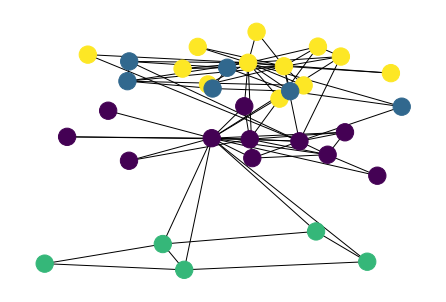

In [31]:
test(G)

In [35]:
from netgraph import Graph


In [37]:
partition_sizes = [10, 20, 30, 40]
# g = nx.random_partition_graph(partition_sizes, 0.5, 0.1)

# since we created the graph, we know the best partition:
node_to_community = dict()
node = 0
for community_id, size in enumerate(partition_sizes):
    for _ in range(size):
        node_to_community[node] = community_id
        node += 1

# # alternatively, we can infer the best partition using Louvain:
# from community import community_louvain
# node_to_community = community_louvain.best_partition(g)

community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
    3 : 'tab:red',
}
node_color = {node: community_to_color[community_id] for node, community_id in node_to_community.items()}

Graph(G,
      node_color=node_color, node_edge_width=0, edge_alpha=0.1,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
)

plt.show()

ValueError: node_color is incomplete. The following elements are missing:
'Evatt R. Hawkes'
'E.T. Stanton'
'J. Woodring'
'M. Gertz'
'Sebastian Mazza'
'Ghulam Jilani Quadri'
'Panagiotis D. Ritsos'
'Jiawei Zhang'
'Gustavo M. Machado'
'D. Hempel'
'Ling Li'
'Angela DePace'
'Ray Juang'
'Armin Kanitsar'
'Mei-Chun Hsu'
'Rodolphe Devillers'
'Yuqun Chen'
'K.N. Vidimce'
'A.B. Rebello'
'A. Pang'
'M. Buscher'
'R. Sukthankar'
'Mark Livingston'
'M.C. Chuah'
'Stacey Choi'
'Qian Chen'
'Zhao-Peng Meng'
'Oliver Hahn'
'Rao P. Gullapalli'
'J. Donath'
'Frans M. Vos'
'Stuart Rose'
'J. Michael Boyle'
'Yating Lin'
'Xiaoqiang Zheng'
'B. Grossman'
'V. Kindratenko'
'S. Wolfsberger'
'J.L.D. Comba'
'Md Amiruzzaman'
'Xiaoliang Zhao'
'Klaus Hinrichs'
'M.B. Stephenson'
'Jonathan Decker'
'Lei Wang'
'J. Finger'
'Yifan Wang'
'J. Rick'
'E. Praun'
'U. Zlender'
'A. Mascarenhas'
'Haeyong Chung'
'Shang-Tse Chen'
'Robert Boudreau'
'A. Vilanova'
'S. Carpendale'
'Trevor O'Brien'
'Martin Schulz'
'W.J. Schroeder'
'Kevin Gurney'
'Yong-Jin Liu'
'Qinghua Zheng'
'Nicholas Kong'
'M. Berth'
'Liu Ren'
'Dominik Meyer'
'Mark Gahegan'
'Liang-Chi Hsieh'
'T. Dwyer'
'Vaidyanathan Krishnamoorthy'
'T.Y. Jiang'
'Elmar Eisemann'
'Michael Zinsmaier'
'C. Montani'
'Brian Duffy'
'Snehal Pokharkar'
'Victor Chen'
'Laura Fritz'
'Graham Johnson'
'A. Turner'
'Ghassan Hamarneh'
'P. Hanula'
'S. Parker'
'Shiqing He'
'M. Jelovic'
'I. Chakravarty'
'J.J. Rieser'
'Johannes Knittel'
'D. Stoffler'
'K. Wong'
'W.J. Campbell'
'Runlin Li'
'Jianben He'
'Weimao Ke'
'M. Marschollek'
'A. Zorcolo'
'Daniel Acevedo'
'Weiming Gu'
'Xinxin Huang'
'Yingmei Lavin'
'Matthew A. Barish'
'Sukwon Lee'
'M.C. Velez'
'S. Levy'
'Daniel F Keefe'
'Jingtao Zhou'
'Miquel Feixas'
'Joachim Giesen'
'Madelaine Boyd'
'Tom Polk'
'G. Golovchinsky'
'C. Posse'
'Masashi Toyoda'
'T.C. Housel'
'F. van Ham'
'A. Fernandez'
'Haiyan Yang'
'Dinesh Manocha'
'Natalia Andrienko'
'Linhao Meng'
'Danielle Albers Szafir'
'Lars Grammel'
'Jun Tao'
'Katja Bühler'
'Nan-Chen Chen'
'M. Vigil'
'Sam Ade Jacobs'
'A. Ebert'
'Milos Krstajic'
'Da Cheng'
'P. Hsu'
'H. Sobieczky'
'Wentao Gu'
'Barbora Kozlíková'
'Mathieu Brulin'
'A. Gay'
'B. Corrie'
'J. Wilkins'
'L.-A. Schreyer'
'R. Twiddy'
'Ka-Ping Yee'
'K. Rodden'
'Chuan Bu'
'Enamul Hoque'
'M.A. Matheson'
'Xinyi He'
'V. Anupam'
'Andreas Tillmann'
'T. Simpson'
'Jing Wu'
'Vanessa Peña-Araya'
'Jan Byška'
'J.C. Hart'
'James Stewart'
'Victor W. Lee'
'Eric SanJuan'
'Marta Farré'
'Gordon Woodhull'
'R.T. Whitaker'
'Youn-Ah Kang'
'Diane Tang'
'D. Lu'
'C. Nafis'
'Maarten Löffler'
'Jim Wall'
'P. Crossno'
'Julie Lein'
'Sandra Bringay'
'M. Krokos'
'David Glickenstein'
'Brian Tomaszewski'
'Mark Duchaineau'
'G. Lahvis'
'David Lloyd'
'Yuli Gao'
'Elsie Lee-Robbins'
'A. Shabo'
'R. Ruhle'
'Claudio T. Silva'
'Christopher White'
'D.A. Shamma'
'B. Jeremic'
'D. Weinstein'
'A. Kumar'
'Chi-Wing Fu'
'J. Meyer'
'Ping Guo'
'C.D. Lee'
'Tom Horak'
'Dmitry Karpeyev'
'T. Mitra'
'R.D. Williams'
'N. Ramakrishnan'
'Gregory S. Aldering'
'K. Hirata'
'Dilip Mathew Thomas'
'M. Margaliot'
'G. Lecina'
'W.E. Lorensen'
'K.H. Hohne'
'Helen Miles'
'Ahsan Qamar'
'P. Rona'
'G. Brookes'
'Andrzej Staszczak'
'Aditya Parameswaran'
'Volker Dicken'
'Caroline Ziemkiewicz'
'Mourad Ouzzani'
'A. Waheed'
'D. Fisher'
'E. Lundberg'
'Simone Lenti'
'Jen Rogers'
'Yadong Wu'
'G. Patnaik'
'Yiyang Tang'
'Ziyi Zheng'
'Dustin Arendt'
'Jinsong Wang'
'Kori Inkpen'
'Paul Navratil'
'Stephen G. Eick'
'J. Wood'
'Alice Thudt'
'Angelos Chatzimparmpas'
'H. Barbach'
'Michael Hund'
'Juergen Waser'
'J. Ebling'
'Deborah N. Huntzinger'
'P.J. Basser'
'C. Demiralp'
'Eduard Gröller'
'Christian Tominski'
'Santhosh Nandhakumar'
'Samira Shaikh'
'Ruixiang Zhang'
'E. Margaret Evans'
'C. Pelkie'
'Jonathan J.H. Zhu'
'Hongyuan Zha'
'Duen Horng Chau'
'P.C.D. Robert'
'Sebastian Weiss'
'P. Mackey'
'Kasper Hornbæk'
'Nicolas Ray'
'James R. Jackson'
'Di Yang'
'D. Varnadore'
'Steffen Oeltze'
'Peng Mi'
'David J. Muraki'
'Xia Lin'
'Gennady Andrienko'
'Charles Perin'
'S.J. Braun'
'George N. Phillips Jr.'
'Youngmin Kim'
'Guadalupe Canahuate'
'J.T. Enns'
'D.E. Breen'
'Armin Pobitzer'
'R. Kikinis'
'J.A. Kohl'
'M. Brewster'
'Greg L. Nelson'
'L.E. Holmquist'
'Marc Hellmuth'
'T.S. Miller'
'F. Zeilfelder'
'J. Burnetti'
'J. Schmidt-Ehrenberg'
'Luis G. Nonato'
'I. Gutenko'
'J. Cohen'
'Ewart Mark Haacke'
'Rainer Burgkart'
'J.J. Van Wijk'
'R.L. Winslow'
'Volker Bromm'
'C. Albrecht-Buehler'
'Hock-Soon Seah'
'Yehuda Koren'
'Gargi Bhattacharya'
'Rick Riensche'
'Yinggang Li'
'A.S. Forsberg'
'Eamonn Maguire'
'Yang Chen'
'James Shearer'
'E. Perry'
'Siming Chen'
'K. Jung'
'Okan Irfanoglu'
'R. Fahlbusch'
'Stephanie Dudzic'
'Elizabeth H. Keating'
'Duen Horng (Polo) Chau'
'Leslie Wu'
'X. Tricoche'
'Mark Wallace'
'Alper Sarikaya'
'Robert Cook'
'J. Hartig'
'Cindy Xiong'
'Z.J. Wood'
'Chengshun Wang'
'V. Argiro'
'Heidi Lam'
'Hossam Sharara'
'Michel Crampes'
'D. Kenwright'
'Rynson W.h. Lau'
'Wei-Chao Chen'
'R. Gayle'
'Yuanyuan Tang'
'Jun Zhu'
'Yuan Gao'
'Thomas Auzinger'
'Bing Wang'
'Hsiang-Yun Wu'
'Jiansu Pu'
'Sohaib Ghani'
'T. Muller'
'Alina Gvozdik'
'Horst K. Hahn'
'Kai Buerger'
'Harshit Mehrotra'
'Jiazhe Wang'
'A. Evans'
'David Hysom'
'María Virginia Sabando'
'Joachim Bottger'
'A. Tal'
'Daniel Jonsson'
'P.M. Mahadev'
'L. Osten'
'Len Kne'
'Karl Proctor'
'Mingliang Xu'
'D. Vock'
'Edward Clarkson'
'Shuyue Zhou'
'Brian Bue'
'M. Schmies'
'G.G. Grinstein'
'Lei Zhang'
'M. Isenburg'
'R. Haimes'
'Michael Mock'
'Jason Dykes'
'P. Chapman'
'Peiying Zhang'
'P. Cotture'
'A. Gerussi'
'Leandro A. F. Fernandes'
'Christopher Mears'
'Wolfgang Stuerzlinger'
'Christopher Shaw'
'E.H.-H. Chi'
'J. Walton'
'H. Barro'
'A. Sigfridsson'
'K.L. Pilgreen'
'Christopher S. Co'
'L. Schuchardt'
'Jonathan Feinberg'
'Peihong Guo'
'Diansheng Guo'
'David Ebert'
'Zhaoqiang Lai'
'A. Landsberg'
'E.H. Chi'
'S. Langer'
'Jae-Seung Yeom'
'Jorge A. Wagner Filho'
'Billy Cheung'
'C. Stein'
'Tom Peterka'
'N. Shareel'
'Àlvar Vinacua'
'Paul Kidwell'
'Saiful Khan'
'Christian Luksch'
'Zhiyuan Wang'
'M.P. Baker'
'W.C. De Leeuw'
'D. Ghosh'
'Russell Taylor'
'Julien Tierny'
'K. Fostiropoulos'
'Qi'an Chen'
'Jarke J. van Wijk'
'G. Kent'
'Changhyun Lee'
'W. Schroeder'
'M. Stephanides'
'R. Rao'
'Donna J. Peuquet'
'Hans-peter Seidel'
'Doris Jung-Lin Lee'
'B. Preim'
'S. Thust'
'M. Williams'
'Frédéric Vernier'
'Mickäel Fabrègue'
'E.A. Sonenberg'
'Will Epperson'
'R. Shekhar'
'Anuj Shah'
'D.J. Cork'
'Hubert Mara'
'Chris Weaver'
'S.M. Shiri'
'V.V. Gusev'
'C.L. Bentley'
'K. Mahrous'
'Remy Vieux'
'L. Knapp'
'Luciana Nedel'
'Mario Romero'
'Flavie Cernesson'
'L. G. Nonato'
'Mathias Schott'
'R.J. Meyers'
'Tak Yeon Lee'
'B. Rundell'
'V. Strela'
'Xi Zhu'
'Joshua Breslau'
'Yu-Hsuan Chan'
'Bo Dong'
'Eddie Simon'
'D.E. Huber'
'Kesheng Wu'
'Mukund Raj'
'Quang Vinh Nguyen'
'D. Aliaga'
'D. Patnaik'
'C. Thornborrow'
'E. Heiberg'
'Andrew Mercer'
'Naren Ramakrishnan'
'Vahan Huroyan'
'Ian T. Ruginski'
'D. Breitschwerdt'
'Alison Duffy'
'John Sharko'
'L. Hirschman'
'G. Pingali'
'Roger A. Leite'
'H. Ruder'
'Konstantinos Efstathiou'
'Florencia Gargiulo'
'A.J.S. Hin'
'Guangyu Jeff Zou'
'M.M. Blattner'
'Diem Tran'
'Mennatallah El-Assady'
'Marlen Promann'
'M. Rosenblum'
'Stefan Jordan'
'Edward Segel'
'E.C. Wyatt'
'Ronan Sicre'
'Tobias Isenberg'
'Ulrik Brandes'
'S.A. Tobet'
'Fuqu Wu'
'Kay Hamacher'
'Yunzhe Wang'
'M. Franaszek'
'L.W. Pickle'
'Torsten Möller'
'Dirk Bartz'
'T. Isenberg'
'Wolfgang Freiler'
'Qi Han'
'A. Glassner'
'B. Gregorski'
'Roland Fraedrich'
'Mike Cammarano'
'Jack Pegg'
'C. Winkler'
'J.E. West'
'Douglas M. Rice'
'Adam Coscia'
'Doug A. Bowman'
'Jingjing Liu'
'Tino Weinkauf'
'Soonwook Kwon'
'J. Inman'
'J.J. Loomis'
'Weichao Wang'
'F. Bossen'
'Giorgio Gaglia'
'Sharmin Choudhury'
'Tavi Murray'
'Min Shih'
'M. McElwee'
'Ling Xiao'
'Srinivasan Parthasarathy'
'Robert Turko'
'R. Sharma'
'Kyeongpil Kang'
'Anders Persson'
'Xiaoyan Fu'
'Steve DiPaola'
'Haijun Xia'
'Frank Rybicki'
'Gregory M. Nielson'
'Timothy Sullivan'
'Walter Fontana'
'Xuejun Hao'
'J. Dollner'
'Colin Runciman'
'Erik Broberg'
'Raymundo Navarrete'
'D.C. Martin'
'Bai Wang'
'Michael Brooks'
'Nan Zhang'
'Zhaohua Ding'
'S. Skiena'
'J. Chen'
'Michael Correll'
'A. Fuhrmann'
'Thomas Vetter'
'Michael Oppermann'
'Xiaotao Nie'
'D. Adams'
'Crescentia Jung'
'Robert Quimby'
'K.R. Sloan'
'Patrice Simard'
'Sanghun Park'
'C. Rocchini'
'A. Zwa'
'Jared Jessup'
'Dirk J. Lehmann'
'B. Ganapathisubramani'
'Graziano Blasilli'
'N. Miller'
'J. Ebert'
'Melanie Tory'
'Ravish Chawla'
'Falk Schreiber'
'Florian Gerhardt'
'K. Wu'
'Steven Houben'
'S.R. Corman'
'T.J. Overbye'
'Tianxiang Chen'
'J. Proctor'
'Yanhua Chen'
'Kun-Ting Chen'
'Wei Liu'
'S.L. Senft'
'Daehyun Kim'
'Aaron Hoff'
'E. Hetzler'
'R.A. Cross'
'Joseph F. DeRose'
'R. Haynes'
'Sebastian Gehrmann'
'H. Elhalawani'
'Hujun Bao'
'S. Kuschfeldt'
'G.J. Clapworthy'
'Marcel Hlawatsch'
'N. Krishnaprasad'
'W. Kienreich'
'P. Tarantino'
'J. Klingner'
'Jie Lu'
'Dominic Schneider'
'David Pugmire'
'Shane Ahern'
'Heike Leitte'
'Alexander P. Auchus'
'C. Hansen'
'A. Gubin'
'Sabin Devkota'
'M.C. Whitton'
'Jian Zhang'
'Vedran Sabol'
'D.E. Sigeti'
'Thomas M. Hamill'
'C.L. Bajaj'
'Mengchen Liu'
'R. Peikert'
'Lester Kwock'
'J. Moorman'
'Pier Francesco Cortese'
'A.F. Westdorp'
'Wenping Wang'
'William Chao'
'H. Edelsbrunner'
'John T. Stasko'
'Corentin Kervadec'
'Florence Y. Wang'
'Jimbo Wilson'
'M. Sato'
'John Wenskovitch'
'J. Kennedy'
'Katy Williams'
'Takahiro Yamamoto'
'H. Hinterberger'
'J. Wu'
'Courtney C. Dornburg'
'I.A. Sadarjoen'
'Boyu Wang'
'L. Pickle'
'Christian Wolf'
'D. Hix'
'R. van der Rijt'
'J. Kehrer'
'Seyedkoosha Mirhosseini'
'Hasan Davulcu'
'Thomas Schultz'
'Julia Docampo-Sánchez'
'Mike Sips'
'Hagen Hans'
'P. Hastreiter'
'Liang Gou'
'H. Steinmetz'
'J. Kniss'
'Daniel Cornel'
'M.Z. Nguyen'
'Sharon Lin'
'Michail Schwab'
'Federico Rossi'
'S.F. Wu'
'Tim Dwyer'
'Sean McKenna'
'Robert Krueger'
'J. Sahner'
'Manuel Heringer'
'J. Timlin'
'N. Kalghatgi'
'S.J. Goodman'
'Bingchen Liu'
'Ko-Chih Wang'
'Magdalena Schwarzl'
'Ethan R. Deyle'
'Edward Coyle'
'Leanna House'
'Mathieu Le Goc'
'Frederick Federer'
'Asher Pembroke'
'Aniket Kittur'
'T. Roxborough'
'Christophe Viau'
'T. Milo'
'Christian Lauterbach'
'E.L. Miller'
'D. Goodsell'
'Ludovic Autin'
'O. Lehmann'
'Gunther Heidemann'
'Hyunjoo Song'
'S.L. Wertheim'
'David Laidlaw'
'L. Mroz'
'Poonam Shanbhag'
'Michael Suehling'
'William Cleveland'
'Binjie Chen'
'Thomas Reinhardt'
'Charles Meneveau'
'Tsai-Ching Lu'
'A. Brandt'
'Alexandre Ancel'
'Haris Mumtaz'
'S. Conreaux'
'Xinwei Shi'
'Martin Isenburg'
'S. Tenginakai'
'Bei Wang'
'K.W. Brodlie'
'James Walker'
'Shuang-Hua Yang'
'Giuseppe Di Battista'
'Marie Vendettuoli'
'T.K. Dey'
'Grzegorz Ligierko'
'M. Cooper'
'A. Leuski'
'S. Laskowski'
'Z. Karni'
'Remco Chang'
'T. Tanasse'
'X.D. Yang'
'J.C. van Gemert'
'M.W. Lo'
'Nils Rodrigues'
'A. Moore'
'G. Lengerich'
'Jo Vermeulen'
'R. Albert'
'Nate Morrical'
'B. Gosselin'
'Janu Verma'
'A. Gepner'
'B. Salomon'
'Rachel E. Clough'
'Zhuochen Jin'
'Bernd Hamann'
'Edwin Püttmann'
'Stephen Kobourov'
'Felix Ritter'
'A. MacEachren'
'J. Edward Swan'
'Audra Buck-Coleman'
'Haiyang Wang'
'B. Levy'
'Corsini Massimiliano'
'Michael Sedlmair'
'L. Sun'
'Jochen Fröhlich'
'Y. Maeda'
'David Krum'
'Claudio Silva'
'Hui Shao'
'Mathias Goldau'
'Tom Abel'
'Frits Post'
'Han Chen'
'B. Hayden'
'T. Onoda'
'Karl Kashofer'
'Raphael Fuchs'
'Mark Newman'
'Fumeng Yang'
'N. Weiler'
'Jean-François Gagnon'
'J. Bossert'
'Stefania Forlini'
'Penny Rheingans'
'Carsten Gorg'
'Faisal Taher'
'Whitney Huang'
'Holger Steeb'
'E. Frecon'
'Meeshu Agnihotri'
'F.J. Rohlf'
'J.T. Stasko'
'Pierre Accorsi'
'R.D. Christie'
'Ashish Kapoor'
'Shenyu Xu'
'Madison A. Elliott'
'Christopher Healey'
'K. Inkpen'
'Matías Selzer'
'K. Claffy'
'M. Falk'
'David Saffo'
'JohnAlexis Guerra-Gómez'
'Y. Chiricota'
'João L. D. Comba'
'Tuan Nhon Dang'
'C. Williams'
'Lu Lu'
'P. Schroder'
'D. Laney'
'Won-Ki Jeong'
'Minho Kim'
'G. Albertelli'
'Yuhua Liu'
'Gary K. L. Tam'
'Garnett Wilson'
'Philipp Zimmermann'
'D. Kamins'
'Yaxing Wei'
'Anne E. Carpenter'
'J. Mattis'
'Ian Thornton'
'Cheuk Yiu Ip'
'Denis Laurendeau'
'Matthias Zeppelzauer'
'T. Kapler'
'S.M.F. Treavett'
'Ming-Hoe Kiu'
'Abhinav Bhatele'
'Matthew Fleenor'
'J. Stevens'
'Awalin Sopan'
'J.L. Posdamer'
'Yuan Zhou'
'Xiaoru Lin'
'I. Grosse'
'Younghoon Kim'
'Kai Liu'
'K. Stockinger'
'M. Meissner'
'Mark Whiting'
'Mirek Riedewald'
'Huub van de Wetering'
'Ralf Botchen'
'M.J. McGuffin'
'Zeyu Li'
'J.A. McDonald'
'P.J. Smith'
'Mario Valle'
'Randall M. Rohrer'
'M. Desbrun'
'Roberto A. Boto'
'M.J. Harrold'
'Nafees Ahmed'
'J. Ahrens'
'Hong Qin'
'Simon Harding'
'Nadine Dräger'
'Winter Wei'
'Aniketh Venkat'
'Daniele Quercia'
'Luc Wilson'
'Chad Jones'
'Jeffrey Heer'
'Vijay Natarajan'
'A. Morrison'
'Fidelia Ibekwe-SanJuan'
'D. Song'
'J.V. Miller'
'J. Heer'
'Joel Lanir'
'David Patrone'
'J. McLeod'
'Omniah H. Nagoor'
'J.D. Cohen'
'Shraddha Agrawal'
'R. Lario'
'Christian Gusenbauer'
'D.A. Roberts'
'Cassiano Sugiyama'
'Michael Schwärzler'
'Aurélien Tabard'
'B. Raffin'
'Rüdiger Westermann'
'I. Marusic'
'Uli Niemann'
'M. Singhal'
'Larry Rosenblum'
'D.H. Rogers'
'Pablo Roman'
'B. Hibbard'
'Ilari Shafer'
'Y. Wang'
'Matthias Gutberlet'
'James T. Klosowski'
'Zhendong Yang'
'T. Kaseda'
'Michel A. Westenberg'
'M. Rumpf'
'L.Y. Pao'
'Michael Balzer'
'Nuo Chen'
'Shuirun Wei'
'Trenton Pulsipher'
'D. Colucci'
'Qiuhan Zhu'
'Emily Miraldi'
'Jiawan Zhang'
'Jonathan D. Cohen'
'Changgong Zhang'
'A. McPherson'
'A. Rockwood'
'S.H. Foster'
'Bedrich Benes'
'Daniel Nascimento'
'F. Marton'
'Yueqi Hu'
'J.P. Lee'
'Joscha Eirich'
'Annika Frank'
'Jimmy Lin'
'M. DesJardins'
'A. Poon'
'M.A. Najork'
'Lin Shao'
'Frans Gerritsen'
'Felipe S. L. G. Duarte'
'D. Gracanin'
'Pernette Verschure'
'P. Felkel'
'E.J. Luke'
'Christoph Flamm'
'Markus John'
'Leon Sering'
'Eric Cowgill'
'E. Moritz'
'O.J. Espinosa'
'Dong-Han Ham'
'Qinying Liao'
'P. Prusinkiewicz'
'authro Speckmann'
'Alan Lez'
'Mark Smith'
'Xue Wu'
'H. Taylor'
'E. Darling'
'Yale Song'
'Douglas Markant'
'Zheng Zhou'
'Xilong Shen'
'B. Lucas'
'D. Banerjee'
'Naohisa Sakamoto'
'Ilir Jusufi'
'D. Dooley'
'Jochen Görtler'
'B. Paul'
'Narges Mahyar'
'W.T. Correa'
'P.J. Mercurio'
'Sarah Gigitashvilli'
'Lujin Wang'
'V. Popescu'
'Ran Chen'
'R. Batra'
'Thorsten Holtkaemper'
'T. Weinkauf'
'Maxim Khailo'
'Oskar Elek'
'C. North'
'Christian Rössl'
'Mihaela Vorvoreanu'
'Yinqi Sun'
'Guozhong Dai'
'Alireza Entezari'
'J.-C. Paul'
'Michael Smuc'
'Igor Jurisica'
'Cory Quammen'
'Burkhard Wünsche'
'Fernando Paulovich'
'E.E. Falco'
'Chenyang Ji'
'Anna Vilanova'
'Natkamon Tovanich'
'Christian Hirsch'
'Joyce Ma'
'A. Hutanu'
'Javier Oliván Bescós'
'J. Robbins'
'K.W. Kurtz'
'Pepe Eulzer'
'Kedar Shrikhande'
'Martin Fink'
'Andrada Tatu'
'Yuanyuan Chen'
'Philipp Weil'
'Zhicheng Liu'
'Terece L. Turton'
'Hugo Buddelmeijer'
'Louis Bavoil'
'I. Bitter'
'Bernd Finkbeiner'
'Elizabeth Munch'
'Zhihua Dong'
'Kristin M. Divis'
'J. Shalf'
'Johannes Fuchs'
'Jin Chen'
'V. Sabol'
'Lu Liu'
'Ross Whitaker'
'A. Murga'
'J. Canny'
'J. Fuchs'
'F. Frankel'
'Tony Bernadin'
'Veronika Irvine'
'Haw-Jye Shyu'
'F. Dierich'
'Markus Sonntag'
'Keith Bein'
'Selim Balcisoy'
'M. Marietta'
'Isaac Cho'
'Ashok Jallepalli'
'D. Lantrip'
'Isaac Liao'
'S. Kochhar'
'Shamkant Navathe'
'M. Tarr'
'H.F. Mayer'
'Steven Schlegel'
'Jaegul Choo'
'Olaf Noppens'
'Alberto González'
'N. Gagvani'
'R.M. Steele'
'Dominik Morent'
'Suyun “Sandra” Bae'
'Bin Wu'
'Gina Venolia'
'M. Czerwinski'
'Yue Wang'
'H. Rueter'
'Wai-Ho Mak'
'Laura A. McNamara'
'A. Lintu'
'P.C. Wong'
'Mieka West'
'Christian Richter'
'Meichun Hsu'
'M. Dieckmann'
'Alfie Abdul-Rahman'
'Joseph Budin'
'Mohammad Ghoniem'
'N. Lopez'
'Laura Matzen'
'R. Herring'
'Zhenyu Guo'
'Maoyuan Sun'
'J. Sean'
'Brianne E. Sherman'
'Weifeng Chen'
'Zhiguang Zhou'
'Christopher De Filippi'
'Guangyu Zou'
'Feng Wang'
'Martin Heß'
'Sara Johansson'
'Scott Butner'
'Jose A. Iglesias Guitian'
'N. Zabusky'
'Ching-Shan Chou'
'P. Burchard'
'C. Haider'
'Lars Kühne'
'Andres Monroy-Hernandez'
'Renaud Blanch'
'Ian Gorton'
'Johannes Landstorfer'
'Marlene Zawin'
'Koji Koyamada'
'R. Wyatt'
'Peter Mindek'
'Zhanglin Cheng'
'Evanthia Dimara'
'Lewis W.f. Li'
'Min Lu'
'Tom Grabowski'
'Silvia Miksch'
'Jens Schneider'
'Anbang Xu'
'Nicholas Seltzer'
'Axel Wendt'
'Chufan Lai'
'Hamza Elhamdadi'
'Gina Eosco'
'Gunther H. Weber'
'Maxime Girardin'
'V. Volkov'
'Shilpika'
'V. Natarajan'
'Fritz Laura'
'G. Knittel'
'K. Polthier'
'Brian Lim'
'Scott Dillard'
'Jayaraman J. Thiagarajan'
'Zheqing Yu'
'James Fallon'
'Andreas Schätler'
'D.M. Krum'
'Isaac Dykeman'
'H. Drevermann'
'Avital Steinitz'
'Christian Pölitz'
'Huihua Guan'
'Wen-Feng Cheng'
'E. Nakamae'
'Simon Butscher'
'Yuan Chen'
'Francesca Samsel'
'Kamkwai Wong'
'Steffen Oeltze-Jafra'
'T.A. Foley'
'Emanuel Zgraggen'
'Gabriel Mistelbauer'
'José Florencio de Queiroz Neto'
'Krzysztof Z. Gajos'
'Wan-chiu Li'
'S. Schkolne'
'C.R. Johnson'
'Ying Yang'
'John Keyser'
'Meredith Ringel Morris'
'M. Levoy'
'John Lee'
'Buono Paolo'
'G.V. Bancroft'
'Tatiana von Landesberger'
'Marti A. Hearst'
'Ratul Mahajan'
'Tim McGraw'
'D. Kuhn'
'Sara L. Su'
'Xinsong Yang'
'He Xiao'
'R. Truyen'
'Sabine Brunswicker'
'Zichun Zhong'
'Weikai Yang'
'Amanda Peters'
'I. Navazo'
'Patrick Fiaux'
'Shreeraj Jadhav'
'Ben Watson'
'A.M. MacEachren'
'S. Ethier'
'Artem R. Oganov'
'Jason Dalton'
'P. Bhaniramka'
'E.A. Rundensteiner'
'John Greenfield'
'Travis L. Bauer'
'Preeti Raghavan'
'Kenichi Yoshida'
'Hans Lamecker'
'Chi-Tang Chang'
'M. Peery'
'W. Lefer'
'Richard Robb'
'Boyang Gao'
'W. Wright'
'Randall Smith'
'Natallia Kotava'
'Prithwish Chakraborty'
'Carey Williamson'
'Guihua Shan'
'George Baciu'
'Fernanda B. Viegas'
'Eric Sauda'
'Benjamin Raphael'
'E.G. Hetzler'
'Eugene Bart'
'Pjotr Svetachov'
'Jesse Kriss'
'Megan Monroe'
'M. Brown'
'Kenneth Vives'
'Siwei Fu'
'Shanaz Y. Mistry'
'Lawrence Roy'
'Rollin C. Thomas'
'D. Baum'
'D.J. Cowperthwaite'
'Muchan Park'
'Christian Heine'
'Renfei Huang'
'Hai Tao'
'Johannes Weissenböck'
'John Gerth'
'Devin Singh'
'Darrel Palke'
'Ralph Wickenhöfer'
'Benjamin P. Bowen'
'Dennis Dimov'
'B.E. Rogowitz'
'David Gotz'
'Xiaoyang Mao'
'Alessandro Giusti'
'Vidar R. Jensen'
'H. Fuchs'
'Pedro Hermosilla'
'Yuhang Zhao'
'Christian Frisson'
'H. Xie'
'Kaiyi Zhang'
'R.S. Avila'
'Ashley D. Spear'
'Björn Krüger'
'A. Wallcraft'
'Kim F. Wong'
'Thomas Dang'
'T. Grace'
'Neil Spring'
'Junhai Yong'
'Ming-Te Chi'
'Usman Alim'
'Youssef S. G. Nashed'
'Caixia Zhang'
'H. Dawkes'
'Danyel Fisher'
'Xingdi Zhang'
'Jingjing Guo'
'Xing Mu'
'A. Hubeli'
'Paulo Ivson'
'Jean-Marc Verbavatz'
'Brian Rexroad'
'Jian Zhao'
'Robert Van Liere'
'P. Ljung'
'K. Allendoerfer'
'Yuan He'
'Chi-Chun Pan'
'G. Roth'
'Kevin Tate'
'Reem Hourieh'
'Lauren Thorson'
'Jina Huh'
'Chen Bao'
'R.J. Lobb'
'Yuhong Li'
'M. Sagar'
'Michael Wybrow'
'Kevin Beason'
'Yuk Yin Sham'
'E.E. Koutsofios'
'Zhao Geng'
'Kenji Shimada'
'R. Jordon Crouser'
'Andreas Lamprecht'
'A. Callan-Jones'
'R.A. Miller'
'Samana Shrestha'
'Eli T Brown'
'R.S. Laramee'
'Rimma V. Nehme'
'Alistair Dove'
'John Bingert'
'Sabrina Bresciani'
'Robin Skånberg'
'M. Schulz'
'Emmanuel Pietriga'
'Elke A. Rundensteiner'
'Magnus Borga'
'Jonathan McLean'
'E. Pepke'
'M. Halle'
'Michael Ankele'
'Julian Stahnke'
'Bin Wang'
'James R. Eagan'
'J. Harris'
'Guy Melançon'
'Lorenz Linhardt'
'Tao Ju'
'T.E. Goldsmith'
'Sasha Schriber'
'Richard Alligier'
'J.P.M. Hultquist'
'Brian Horst'
'M. Wagner'
'Ulderico Fugacci'
'Peter Bak'
'S. Krishnan'
'D. Wills'
'Di Weng'
'Thilo Spinner'
'Haidong Zhang'
'M.P. Persoon'
'Eveline H. J. Mestrom'
'Jesse Fugitt'
'Joseph Botros'
'Xinke Wu'
'R. Balakrishnan'
'Jacob Ritchie'
'Chao Han'
'Charles Berret'
'B. Johnson'
'Chris Headleand'
'Heike Jänicke'
'Andy Bardill'
'Bei Chen'
'Jessica Peter'
'Jonathas Costa'
'Patrick Houthuizen'
'Sheila Bonde'
'Remo Burkhard'
'Arthur R.A. Bouwman'
'Weiqiang Zhang'
'Julio Daniel Silva'
'Nina McCurdy'
'Enxun Wei'
'J. Roberge'
'Zhongwen Huang'
'Kenneth Joy'
'Paul Hoover'
'Jun Wang'
'Shoubin Cheng'
'P. Wonka'
'J. Assa'
'Justin Mauger'
'Roel Truyen'
'Bernhard Preim'
'W.E. Fordyce'
'Keshav Dasu'
'Wei Li'
'Jishang Wei'
'John Gjelberg'
'Peter Kok'
'Florian Foerster'
'Xin Zhao'
'T. Schreiber'
'Gabriel Cantareiro'
'Zuobin Wang'
'Dominika Mazur'
'Lifeng Zhu'
'Malu Castellanos'
'D. Rose'
'D. Banks'
'Gaofeng Deng'
'Yunfan Bao'
'Bridget Moynihan'
'Martin Luboschik'
'Valerio Pascucci'
'Brian Summa'
'Will Usher'
'Andrei C. Jalba'
'Yi-Chih Tsai'
'Zafar Ahmed'
'Hao Wang'
'Shaun Canavan'
'Tim Biedert'
'G.-I. Bischi'
'Tobias Astrom'
'David Feng'
'J.D. Hollan'
'Kai Zhao'
'Jian Huang'
'D.A. Rushall'
'Ann Sherlock'
'P. Neville'
'Jae Choi'
'C.A. Burton'
'Sebastian Baltes'
'Frank Grave'
'N. Fanst'
'Yeuk Yin Chan'
'Hanyi Chen'
'Theresa O'Connell'
'Tom Tricoche'
'L. Gleason'
'Ingo Wald'
'Daniel Keim'
'H. Qin'
'J.-L. Dillenseger'
'Matt Whitlock'
'Sharon Laskowski'
'Jesus J Caban'
'A.G. Hauptmann'
'Lace Padilla'
'Qiaomu Shen'
'Jen-Ping Chen'
'Sylvia Glaßer'
'Eric Lecolinet'
'Erik W. Anderson'
'Fearn Bishop'
'Jason D. Williams'
'Gregory Heinlein'
'A. Stephens'
'Chenglong Wang'
'Hao Yang'
'Jinzhu Gao'
'Elisa Portes dos Santos Amorim'
'Jai Y. Yu'
'Roseann Bongiovanni'
'R.M. Adams'
'D. Williams'
'Denis Gračanin'
'Carsten Görg'
'Timothy M. Shead'
'Philippe Rocca-Serra'
'Fan Hong'
'Nils Gehlenborg'
'M. Olree'
'C. Hoffmann'
'Sung-Hee Kim'
'Marco Jenny'
'William Barth'
'Richard Strelitz'
'R. Tam'
'Il-Hong Jung'
'J. Winstead'
'R. van Liere'
'Osamu Saeki'
'V. Pascucci'
'S. Lombeyda'
'G. Turner'
'Benjamin Holland'
'Mikayla Biggs'
'Vadim Slavin'
'S. Premoze'
'Rahul Kanna'
'L.M. Desjarlais'
'J. Harrison'
'Jouke Dijkstra'
'Maximilian Weiß'
'B. Frohlich'
'Stephan Reiling'
'Kejian Zhao'
'C. Grosch'
'Baining Guo'
'M.S. Drew'
'G. Loriot'
'Austin P. Wright'
'B. Becker'
'Samuel Huron'
'P. Samuel Quinan'
'Yinqiao Wang'
'C.A. Shaffer'
'Gerald Penn'
'Anshul Vikram Pandey'
'Minsu Ahn'
'T. Gerstner'
'R. Scoggins'
'Gaël Guennebaud'
'Steven P. Callahan'
'Arthur Olson'
'Dongning Luo'
'Ishwar Kulkarni'
'Xinlong Zhang'
'T. Hamburger'
'J. Moore'
'Samuel Gerber'
'T.E. Clifton'
'Ethan Kerzner'
'Smiti Kaul'
'Johannes Sorger'
'Guoli Yan'
'Guilherme Telles'
'Kollukuduru Sravanthi'
'S. Klasky'
'Patrick Riehmann'
'Uta Hinrichs'
'D.L. Gresh'
'V.L. Jacobson'
'Y.J. Kil'
'W. Hibbard'
'Yanna Lin'
'Simon H. Sündermann'
'Christian Blecha'
'G. Fekete'
'H.-O. Peitgen'
'J. Dale'
'Sven Hermann'
'B.B. Bederson'
'Dianne Cook'
'G.L. Lohse'
'Goethem Arthur Van'
'P.S. McCormick'
'Adam Sah'
'Y. Koren'
'W. Horn'
'Thomas Mühlbacher'
'Lvkeshen Shen'
'U. Adamy'
'Alice Chu'
'Yingjie Victor Chen'
'A. Anand'
'Herbert Edelsbrunner'
'D. Gotz'
'Daniel Plakinger'
'Harinarayan Krishnan'
'Álvar Vinacua'
'S. Scheithauer'
'Y. Zhao'
'M. Pottier'
'D. Selle'
'Nick Cramer'
'Tzi-Cker Chiueh'
'Steve Kieffer'
'M. Wattenberg'
'Faraz Zaidi'
'Tai-Quan Peng'
'Bruno Gonçalves'
'C. Mandal'
'Xinyi Zhou'
'M. Beric'
'U. Clarenz'
'S. Kumar'
'M. desJardins'
'Xiaolong Zhang'
'Caterina Rosano'
'W.A. McNeely'
'R. Bosch'
'Colin Swindells'
'D. A. Storchak'
'Michael Kern'
'Xiangtong Chu'
'Florian Frieß'
'Minjeong Kim'
'Ananda Montoly'
'Shaun D. Jackman'
'Carmen Hull'
'N.E. Hurlburt'
'C. Forsell'
'Scott Pezanowski'
'J.C. Bennett'
'Bum chul Kwon'
'S.T. Bryson'
'M. Gray'
'James Tompkin'
'Bernd Hentschel'
'Jarke J. Van Wijk'
'Yi Mao'
'J. Grosjean'
'Fenjin Ye'
'Shuainan Ye'
'W. Klieber'
'Cheryl Qian'
'Scott D. Rothenberger'
'S.N. Crivelli'
'Morteza Karimzadeh'
'E. Fanea'
'Andrea Brambilla'
'R.P. Botchen'
'Nathan Mays'
'Anne Laprie'
'N. Green'
'B. Heckel'
'G.Z. Yang'
'Ashley Wheat'
'Le Liu'
'B. Williams'
'Sven Schulte'
'J. Gao'
'Jaime Montemayor'
'Matthias Bernhard'
'C. Aldrich'
'Wen-Chin Chen'
'C. Bash'
'Theophanis Tsandilas'
'Jocelyn Ng'
'Yu-An Chen'
'Eytan Adar'
'M.M. Oliveira'
'Patrick Degener'
'Gunther Bloschl'
'Narayanan Kasthuri'
'Bastien Liutkus'
'B. Elgohari'
'M. Ward'
'Cem Yuksel'
'Roman Garnett'
'Ying Tu'
'Martin Haidacher'
'P. Sutton'
'L. De Floriani'
'Lamont Samuels'
'Christian Dick'
'Phil Moore'
'J.C. King'
'A.W. Appel'
'Harald Bosch'
'A. Johnson'
'Sarkis Halladjian'
'M.O. Ward'
'Soumya Dutta'
'P.J. Kilner'
'Ilknur Icke'
'R. Brady'
'S. Eick'
'J. Kundu'
'Yea-Seul Kim'
'Patrick Moran'
'A. Bogomjakov'
'Fan Du'
'B. Jobard'
'Jeffrey Dicarlo'
'J. Orman'
'A. State'
'Eric Lee'
'Baldur Van Lew'
'W.V. Wright'
'Leland Wilkinson'
'David H.S. Chung'
'Margaret-Anne Storey'
'Andrew Higginbotham'
'F.H. Posti'
'P. Craig'
'Cagatay Turkay'
'Zhibin Wang'
'Niklas Roeber'
'Michael Behrisch'
'P. Hanrahan'
'G.L. Kinzel'
'Stefan Jänicke'
'M. Lieser'
'Huan Song'
'Eli Packer'
'B. Parlett'
'Tran Minh Quan'
'J. Levit'
'Yijie Hou'
'D. Sturtz'
'Edward Swing'
'Helia Hosseinpour'
'Jesus J. Caban'
'K.A. Kreeger'
'Sehi LYi'
'Eugene Wu'
'M. Maltrud'
'Christian Rössi'
'B. Yamron'
'Z. Konyha'
'Hui Ma'
'K. Bidmon'
'A. Rice'
'J.P. Paris'
'Jan-Henrik Haunert'
'Sebastian Mittelstadt'
'G.L. Schussman'
'D. Fleischmann'
'Baoquan Chen'
'Chen Chen'
'J. Schneidewind'
'Julius Parulek'
'J. Agutter'
'David Duran'
'O. Fechtig'
'Martin J. Eppler'
'T.A. Keahey'
'Iwan W. Griffiths'
'Qianwen Wang'
'S. Dar'
'Carla E. Brodley'
'M. Vaudin'
'P. Burger'
'Pierre Dragicevic'
'O. Nilsson'
'Andreas Kerren'
'A. Imamiya'
'Christopher G. Healey'
'Jeremy Boy'
'C. Garner'
'S. Iserhardt-Bauer'
'Shunan Guo'
'L. Rosenblum'
'Doug Fritz'
'T. Delmarcelle'
'Georges Grinstein'
'Gerald M. Pao'
'David Van Riper'
'Michael E. Papka'
'Qiaoan Chen'
'Christopher Burns'
'Markus Glatter'
'E. Bouvier'
'Xiangyang Wu'
'Paula Kayongo'
'Filip Dabek'
'Florian Grassinger'
'S. Maxwell'
'Volker Klemann'
'G. Schlosser'
'John Patchett'
'Jaeyoung Kim'
'Aidong Lu'
'L. Ritter'
'R. Dachselt'
'H. Videau'
'S.G. Kobourov'
'Dora Kiesel'
'Gemma Sanderson'
'Rebecca Nowak'
'P.M.A. van Ooijen'
'J. Schwegler'
'Jozef Bátrna'
'Wes Bethel'
'J. Kaba'
'Yu Zhang'
'Jessica Magallanes'
'Robin Bader'
'Yongjun Zheng'
'Lawrence Staib'
'S. Walton'
'M. Antonijuan'
'Eddie Polanco'
'Van Quan Ho'
'C. Weigle'
'Crystal Ju'
'D.C. Banks'
'Wei-Chao Wen'
'A.J. Fenlon'
'Lawrence T. Glickman'
'J. Behr'
'Jamal Paden'
'B.H. McCormick'
'Pierluigi Taddei'
'Darren Treanor'
'B.D. Greenberg'
'Tiziana Catarci'
'B. Yamrom'
'Lauro Lins'
'Jonathan Zhang'
'Victor M. Calo'
'Fernanda B. Viégas'
'Gordon L. Kindlmann'
'T. Moller'
'A.R. Sanderson'
'Martha-Cary Eppes'
'K. Riley'
'V. Saini'
'Michael Stryker'
'Xin Tong'
'O. Engelsen'
'Kanupriya Singhal'
'Ravin Balakrishnan'
'Sonia Castelo'
'D. Ellsworth'
'Yubo Tao'
'Z.C. Zheng'
'B. Rabinovich'
'Pavol Ulbrich'
'Donald House'
'Joseph Marino'
'W.B. Thompson'
'F. Sadlo'
'R.G. Hughes'
'Audrey S. Wang'
'Haoxuan Wang'
'Yuetling Wong'
'Liangjun Liu'
'Benjamin T. Readshaw'
'Voicu Popescu'
'A. Sadiq'
'R. Weinberg'
'Tanya Clement'
'Junpeng Wang'
'B. Lloyd'
'M. Ghoniem'
'D.T. Chen'
'Xian Teng'
'S. Lakare'
'S.C. Garrick'
'Antti Oulasvirta'
'D. Manocha'
'Tamara Munzner'
'Shahid Latif'
'Alexandra Diehl'
'Preeti Malakar'
'Luisa Lu'
'Sarah Nason'
'S. Mehta'
'Florian Ferstl'
'Sung Ye Kim'
'Y. Jean'
'X. Shi'
'Jörn Kohlhammer'
'Michael Gleicher'
'Bowen Yu'
'Sietse J. Luk'
'Cheng Li'
'Susan Mniszewski'
'Robert A. Bridges'
'R.A. Becker'
'Mark Igra'
'L. Balmelli'
'Devanshu Arya'
'Norman Au'
'M. Wan'
'Jimmy Johansson'
'Hyunggoog Seo'
'H.E. Rushmeier'
'Andreas Thom'
'Frits Koning'
'Mark A. Livingston'
'C. Roux'
'Steven R. Corman'
'Kaixin Chen'
'Lorna Role'
'Andrea Unger'
'Jun Liao'
'I. Finocchi'
'Kenneth Weiss'
'K. Borner'
'Shawn Bohn'
'Zeqian Shen'
'Mark van de Ruit'
'M. Wadle'
'N. Gershon'
'Lichan Hong'
'P.S. Heckbert'
'T. Yoo'
'Lyn Bartram'
'A. Szymczak'
'Robert S. Laramee'
'Ed H. Chi'
'Wei Xu'
'Wolfgang Nowak'
'Mahsa Mirzargar'
'C. Furse'
'Françoise Detienne'
'V. Crow'
'Iain Dillingham'
'Sikun Li'
'Heike Janicke'
'P. Pu'
'D. Bartz'
'Wewnen Dou'
'Stef van den Elzen'
'William A. Pike'
'Daisuke Sakurai'
'R. Yagel'
'Jennifer Frazier'
'Ruwen Schnabel'
'A.V. Nelson'
'Juraj Palenik'
'J. Uhlmann'
'Chris Hughes'
'G.M. Parulkar'
'Matthew O. Ward'
'Guan Li'
'Amir Hossein Hajizadeh'
'K. Brodlie'
'Denis Gracanin'
'Rita Borgo'
'E.I. Kelton'
'H. Cline'
'Jonathan Cohen'
'Mahdi Pakdaman Naeini'
'Anna A. Shaverdian'
'Richard Pawlicki'
'Oded Nov'
'R. Niemeier'
'G. Kindlmann'
'Ketan Mehta'
'S.P. Callahan'
'T. Spelce'
'Kai Yan'
'J. Bryan'
'P. Riehmann'
'Bob Fields'
'R.M. Taylor'
'Natascha Sauber'
'Camilla Forsell'
'R. Clay Reid'
'P. Rander'
'K. Esbensen'
'J.A. Jones'
'M. Pauly'
'H.V. Jagadish'
'Daniel Ha'
'Michael Brudno'
'E.M. Wenzel'
'Yanqiu Wu'
'Chris P. Gale'
'Dogan Demir'
'Atul Rungta'
'Franziska Sauka'
'D. Kirk'
'R. Patterson'
'Yuzuru Tanahashi'
'Nathalie Reuter'
'T. Myerson'
'B. von Rymon-Lipinski'
'Helmut Doleisch'
'D.R. Nadeau'
'M. Shahriar Hossain'
'Yaniv Frishman'
'Prashant Kumar'
'T.S. Yoo'
'Cesar Palomo'
'L. Hesselink'
'Melanie Gorner'
'M. Trutschl'
'Karthik Ramani'
'Victoria Lemieux'
'Young-Ho Kim'
'Arlind Nocaj'
'Seungyeon Kim'
'M. Sick'
'E. Wes Bethel'
'Zhifan Zhu'
'Jos B.T.M. Roerdink'
'Ronald M. McLaughlin'
'Stephen Ingram'
'Matthew Ward'
'C. Csallner'
'J. McGinley'
'Charl P. Botha'
'Mingwei Li'
'S. Ziegeler'
'Ke Xu'
'P. Doddapaneni'
'Jeff W. Lichtman'
'Jason Leboe'
'E. Puppo'
'A. Mankofsky'
'Igor Guskov'
'Seok-Hee Hong'
'Yanlai Chen'
'Florian Heimerl'
'Abdul Rahman Shaikh'
'Hayeong Song'
'D. Watson'
'A. Freed'
'Moritz Ehlke'
'J. Nichols'
'D. Yanovsky'
'Josua Krause'
'J. Keyser'
'D. Wagner'
'C.-C.J. Yen'
'A. Kanitsar'
'Jianlong Zhou'
'Jan Van Gemert'
'Nilaksh Das'
'J.L. Kempf'
'K. Brodie'
'Michael Blumenschein'
'G. Ross'
'Scott Stevson'
'B. Spence'
'Jameson Miller'
'Jakob Bonart'
'Renata Georgia Raidou'
'Sandy Engelhardt'
'Michael J. McGuffin'
'Yan-Jen Su'
'Marie desJardins'
'Jiaxi Hu'
'Yen-Ting Kuan'
'David H. Rogers'
'Stephan Wenger'
'Ming-Yuen Chan'
'Yingyu Wu'
'Dongxing Teng'
'Jake Solomon'
'Phoebe Moh'
'Alexander M. Rush'
'Yoonsoo Nam'
'L.I. Ponomarev'
'Bonan Li'
'W.R. McCloskey'
'Eric D. Ragan'
'Zhe Wang'
'Henk Bekker'
'A.E. Turner'
'Adam Kunen'
'H.-P. Bunge'
'H.-P. Kriegel'
'J. Gundrum'
'Peter J. Polack'
'E. Nanthakumar'
'Filip Sadlo'
'Stéphane Conversy'
'Ugo Varetto'
'C. Shimizu'
'Boris Müller'
'Han-Wei Shen'
'Jun Han'
'M.L. Lantin'
'K. Andrews'
'Norbert Lindow'
'Mark Jones'
'Michael Czabaj'
'K. Matkovic'
'E.L. Raible'
'S. Parthasarathy'
'Jurgen Bernard'
'Wei Zhu'
'S. Morris'
'S. Ozenne'
'Aaditya G. Landge'
'Reyk Hillert'
'Roy van Pelt'
'Susanne Schnell'
'K. Montgomery'
'J. Carriere'
'Francisco Díaz'
'Marco DeRuiter'
'Zhenyu Cheryl Qian'
'F.L. Wefer'
'V.B. Tran'
'Miaoxin Hu'
'Gerome Miklau'
'George Legrady'
'Ruwayda Alharbi'
'J. Blendell'
'Harald Piringer'
'Y.-J. Chiang'
'P. Moran'
'Jeremy G. Freeman'
'Madeleine Grunde-McLaughlin'
'T. He'
'Duong Hoang'
'G.D. Finlayson'
'Roy A. Ruddle'
'R.K. Batra'
'Joshua Vander Hook'
'Jo Wood'
'John F. Hughes'
'Meister Eduard Gröller'
'Jean-daniel Fekete'
'Jing Jin'
'Gregory Cipriano'
'Kai-Hon Lau'
'Roland N. Boubela'
'A.W. Anderson'
'Aoyu Wu'
'Haifeng Zhang'
'M. Straka'
'Guillaume Colin De Verdiere'
'Klaus Mueller'
'Joseph N. Burchett'
'Adam Jurčík'
'E. Rawdon'
'M.J. Allison'
'P. Barry'
'Marina E. Eremeeva'
'Alexei A. Efros'
'Gerhard Klimeck'
'Xiaoyi Wang'
'Hannah Kim'
'Jason Wiese'
'Ravi Ramamoorthi'
'Amin Abbasloo'
'D.A. Lane'
'D.A. Alcantara'
'Keith Clarke'
'Joe Kohlmann'
'P. Blanchard'
'J.D. Pearlman'
'John Darrell Van Horn'
'Thomas Grechenig'
'S. Paulson'
'B. Lorensen'
'Ovidiu Ancuta'
'Yuanzhe Hu'
'Xinyuan Yan'
'Christoph Peters'
'Friedrich von Henke'
'N. Hanssen'
'P.A. Heng'
'Jorg-Stefan Prassni'
'B. Estus'
'Yan Lyu'
'Bela Soni'
'G.P. Johnson'
'K. Marx'
'D. Lamb'
'Daniel Gruen'
'Daniel Olson'
'Frits H. Post'
'Richen Liu'
'Timothy Luciani'
'G. Zhuang'
'Heidrun Schumann'
'Katherine Weaver'
'Markus Höferlin'
'Ronghua Liang'
'Brendan Moyle'
'P.K. Robertson'
'P.P. Pebay'
'Raymond Huang'
'Thomas Torsney-Weir'
'Jeffery Chieh Liu'
'A. Telea'
'Tim Lammarsch'
'T. Starner'
'J. Winterkamp'
'Wing-Yi Chan'
'W. Krueger'
'S.J. Harrington'
'Mathias Neugebauer'
'Jevgenij Jegorovs'
'Byonghyo Shim'
'J. Magewick'
'Katerina Vrotsou'
'Vladimir Molchanov'
'A. Majumder'
'J. Meng'
'D. Kriegman'
'S.C. North'
'J. Rossignac'
'Naveen Pitipornvivat'
'Furui Cheng'
'Scotland Leman'
'W. Hodges'
'Guia Gali'
'H. Theisel'
'Ana M. Cuadros'
'Chiew-Lan Tai'
'Zhaosong Huang'
'Jerry Alan Fails'
'Lyndsey Franklin'
'Mathieu Pont'
'Silvia Fademrecht'
'Hanqi Guo'
'E. Jurrus'
'Katarína Furmanová'
'Dave Huber'
'Jaakko Peltonen'
'P.J. Verschure'
'Matthew Cooper'
'K.P. Hinckley'
'D.L. Brittain'
'Jos B. T. M. Roerdink'
'R.M. Edsall'
'Sujan Anreddy'
'Kai Li'
'Marcel van't Veer'
'O. Sorkine'
'Jie Li'
'Margit Pohl'
'Andrew T. Wilson'
'Mikkel R. Jakobsen'
'C.J. Morris'
'Ying He'
'Z. Ahmed'
'Amy K. Karlson'
'Andrew Callan-Jones'
'Christoph Wimmer'
'A. Sud'
'Jiayun Fu'
'Nan Chen'
'Mario Jelovic'
'Halden Lin'
'M. Leila Mays'
'J.-D. Fekete'
'G. Elisabeta Marai'
'Bernhard Jenny'
'Shayan Monadjemi'
'Manuel M. Oliveira'
'Milana Huang'
'Dipayan Maiti'
'D. Tost'
'Benjamin Rowland'
'Jorge Piazentin Ono'
'Thomas Pabel'
'Jiancheng Song'
'Zhen Li'
'Ravi S. Nanjundiah'
'Bryan McDonnel'
'James Wilson'
'P. Nardini'
'Antony Unwin'
'Ronald Peikert'
'Julian Heinrich'
'Shichao Jia'
'M.C. Miller'
'Neeraj Krishnan'
'B.A. Singer'
'Helwig Hauser'
'Alexandra Lee'
'O. Kreylos'
'Katherine McDonough'
'Richard Gee'
'Erich P. Stuntebeck'
'J.L. Williams'
'R. Dougherty'
'Andre Schmeiβer'
'Kelly Gaither'
'Tear Marie Green'
'Kyle Wm. Hall'
'Maximilian Baust'
'Pramod Chundury'
'F. Bernardini'
'Susan Knoblach'
'Cong Wang'
'Graeme Gange'
'Marta Kersten'
'Jian Chen'
'Tushar M. Athawale'
'Tanja Blascheck'
'Robert Zeleznik'
'Guido Tack'
'Mark Borowsky'
'Cláudio T. Silva'
'K.G. Bemis'
'Yaqi Qin'
'Geoffrey Ellis'
'Robert Judson-Torres'
'Gilles Bailly'
'M. LaPolla'
'Carola Wenk'
'Imma Boada'
'N. Syroid'
'Anuj Jaiswal'
'G. Smith'
'C. Johnson'
'Kai Burger'
'Patrick Wickenhäuser'
'Martin Hering-Bertram'
'Shenghui Cheng'
'P. Filzmoser'
'G. Sakas'
'A. Varshney'
'Alethea Bair'
'Sarah Goodwin'
'Dylan Cashman'
'Katja Buhler'
'T.j. Jankun-Kelly'
'Steven Wood'
'L. Bavoil'
'Evan Suma'
'M.S. Marshall'
'Qingguang Cui'
'R. Heilmann'
'Daniel Cohen-Or'
'Sai Prashanth Dasari'
'Carla Floricel'
'D. Nuesch'
'David Gotzy'
'Daniel Toloudis'
'G. Weber'
'Aakash Goel'
'L.F. Hodges'
'Wieland Reich'
'Christopher D. Shaw'
'Venkatram Vishwanath'
'William Ribarsky'
'Zhihua Jin'
'J. Temkin'
'B. Alpern'
'L. Ulitsky'
'Victor Guallar'
'Cong Liu'
'Justine Blanford'
'Jennis Meyer-Spradow'
'C. Harris'
'Todd Gamblin'
'Qing Li'
'Y. Kita'
'Robert Zawadzki'
'V. Pekar'
'Rita Sevastjanova'
'Maureen C. Stone'
'W. Renz'
'K. Santilli'
'W. Shackelford'
'R.T. Haftka'
'Xiaojuan Ma'
'Andrew Burks'
'Michael Burch'
'Xinyue Xu'
'Elizabeth Braunstein'
'S. Guthe'
'Weiwei Cui'
'Khaled Ai- Thelaya'
'Boyan Zheng'
'Frans Vos'
'Bernhard Sadransky'
'Constance May Bainbridge'
'Andrzej Szymczak'
'Sean McCullough'
'M. Garland'
'M.G. Surette'
'A. Barr'
'Chin-Yew Lin'
'R.J. Moorhead'
'Tudur Davies'
'Heike Hofmann'
'J. Freire'
'Axel J. Soto'
'F. Vega-Higuera'
'Emily Fujimoto'
'A. Badre'
'Jian Cui'
'Samuel Leventhal'
'Andreas Paepcke'
'P. Brewster'
'Cong Guo'
'Matthias Zieker'
'Dimitrios Mitsouras'
'C.D. Hansen'
'P. Adams'
'Haojin Jiang'
'Khairi Reda'
'Z. Liang'
'Abishek Puri'
'Wing Yan So'
'G.-S. Li'
'S.C. Lu'
'Winston Hsu'
'David Whitney'
'Leilani Battle'
'Walid G. Aref'
'C.M. Wilson'
'Xiao Xie'
'A. Finkelstein'
'Eugene Zhang'
'Irene Baeza Rojo'
'P. Gros'
'Eduardo Bringa'
'Gerhard Pittino'
'John J. Baglino'
'Cheng Tang'
'P.A. Rona'
'Alex Endert'
'B. Geisler'
'Yusu Wang'
'Markus Probst'
'Glenn Taylor'
'C.S. Jones'
'Andrew Vande Moere'
'Markus Rutten'
'W.A.A. Nuij'
'G. Grigoryan'
'D.H. Cui'
'Jane Hoffswell'
'Keke Wu'
'Maurizio Pizzonia'
'Paul van der Corput'
'Sean Follmer'
'Kristin Cook'
'Junhong Wang'
'Erik H.H.M. Korsten'
'Laura Garrison'
'Xin Chen'
'Duong B. Nguyen'
'Kai Lawonn'
'Ian Bowman'
'Gail Ahn'
'Rebecca Dreezer'
'Joerg Meyer'
'E.T. Ahrens'
'R.Y. Novoselov'
'Scott Houde'
'H. Ishikawa'
'Yu-Kun Lai'
'D. Schissel'
'Yanli E.'
'J.S.B. Mitchell'
'Layla Shahamat'
'Alessandra Angelucci'
'Andras Lukacs'
'T. Biddlecome'
'K. Schwan'
'K. Buhler'
'Michael Sprenger'
'Joakim Kilby'
'K. Fischer'
'S.K. Lodha'
'W. Aigner'
'Cristina Nita-Rotaru'
'Zac Lucarelli'
'Wen Zhong'
'Yedendra B. Shrinivasan'
'Benjamin Lee'
'Donia Badawood'
'David R. Karger'
'F. Bendix'
'Amir H. Meghdadi'
'Jungu Choi'
'S. Djurcilov'
'S.S. Fisher'
'P. Thomas Fletcher'
'Anoop Sarkar'
'Wesley Willett'
'R. Pelcovits'
'Stephan Diehl'
'David Wiley'
'M. Handte'
'Lukas Birn'
'Jinwook Seo'
'Xiangong Ye'
'C. Hendrickson'
'Phil Amburn'
'A. Patro'
'Carlos E. Scheidegger'
'Matthew Hurst'
'R. Kahler'
'Shah Rukh Humayoun'
'Joe Bruce'
'Hao Dong'
'Timothy F. Brady'
'Naz Khalili-Shavarini'
'Jonghun Park'
'F. Hardisty'
'Daniel R. Tesone'
'Maria-Elena Froese'
'Xiaoyu Zhang'
'J. Juric'
'Michael Glueck'
'M. Hanfler'
'Steve Kelling'
'Allison T. Silverman'
'S. Wildermuth'
'J. Wright'
'Levente Sipeki'
'J.M. Favre'
'Pak Chung Wong'
'Paul Thompson'
'Qingyang Xu'
'Caitlin Gutheil'
'O. Staubli'
'Greg Abram'
'Sungahnn Ko'
'André Reichenbach'
'Wei Peng'
'Caitlyn M. McColeman'
'P. Kochevar'
'S. Foresti'
'Raoul Hopf'
'M.C. Freund'
'J.C. Renteria'
'D. Wu'
'M.D. Doyle'
'Gregory D. Abowd'
'C. Falkenberg'
'Xinzhu Mu'
'A. Neeman'
'C. Dunmire'
'Christian Tietjen'
'M.S. Peercy'
'S. Bjork'
'D.S. Fussell'
'R.K. Scoggins'
'Jay Summet'
'M.B. Mineev-Weinstein'
'Jihye Yun'
'Aida Nordman'
'D. Darmofal'
'Airong Luo'
'Xiaoming Liu'
'Emil Axelsson'
'Colin Dewey'
'K.R. Subramanian'
'B. Rosenburg'
'R. Paffenroth'
'Zhengrong Liang'
'Philipp Koytek'
'Philip Berger'
'Derek W. S. Gray'
'D.A. Duce'
'Biswaksen Patnaik'
'John Alexis Guerra Gómez'
'N. Nathan'
'David Burlinson'
'K. Junyaprasert'
'William Wright'
'Rodolfo Ostilla Monico'
'Jianfei Chen'
'D. Loisel'
'R. Kosara'
'Renato Pajarola'
'Dieter Fellner'
'Julie Gerdes'
'A. Rind'
'E. Gschwind'
'Veronika Šoltészová'
'Jay Koven'
'Jeremy Muhlich'
'Xiaoming Li'
'Christoph Hoffmann'
'E.T. O'Brien'
'J. Duce'
'Nicole Sultanum'
'Zhimin Li'
'Yun Jang'
'Josef Focht'
'Wenlong Chen'
'R.K. McCabe'
'Ho-Lun Cheng'
'Guy-Warwick Evans'
'Ezekiel Bhasker'
'Philip A. Legg'
'Ezekiel S. Bhasker'
'Pradeep Sen'
'Kevin Boone'
'M. Pichler'
'Kevin Buchin'
'Olaf Konrad'
'D. A. Keim'
'Andreas Bannach'
'J. Bernhardt'
'Jean-François Im'
'Niklas Elmqvist'
'G. Otto'
'S.J. Young'
'Drew Skau'
'M. Malaterre'
'Dominik Engel'
'Jamison Daniel'
'Andreas Elsener'
'Gonzalo Ramos'
'M. Zatloukal'
'Daniel Engel'
'István Kókai'
'Jorji Nonaka'
'Pedro R. Walteros'
'Oliver Van Kaick'
'Shashank Sunkavalli'
'K. Biolsi'
'Katrin Heitmann'
'B.-J.M. Webb-Robertson'
'Mikhail Smelyanskiy'
'Wenyuan Wang'
'Jina Suh'
'G. Melancon'
'G. Wiese'
'Bharath Kalidindi'
'Johannes Kehrer'
'G. Cybenko'
'P. Rheingans'
'D.H. House'
'Hongfeng Yu'
'Noa Fish'
'G. Welch'
'D.P. Groth'
'Desney Tan'
'John J. Socha'
'Thorsten Breitkreutz'
'Bongwon Suh'
'Chris R. Johnson'
'J.D. Weber'
'Xumeng Wang'
'R. Mackenzie'
'Patrick Mackey'
'Lauren Bradel'
'Xiongfei Luo'
'K.M. Martin'
'E. Diep'
'Gregorio Palmas'
'Meemong Lee'
'A. Kupfer'
'J. Thomas'
'U. Hoffmann'
'Lars Hufnagel'
'G. Lommerse'
'Reinhard Klein'
'Vincent van Unen'
'Lars Huettenberger'
'Yifan Wu'
'John Werner'
'Joanne Taery Kim'
'Justin Talbot'
'M. Correa'
'Xinli Hou'
'Steven Franconeri'
'R. Manley'
'Micah Acinapura'
'C. Garbe'
'Annemieke Verbraeck'
'Zeyuan Huang'
'R. Beale'
'Nazanin Kadivar'
'R. Amar'
'Elke Rundensteiner'
'Tonya Smith-Jackson'
'R. Rose'
'A.J. Kolojechick'
'M. Wunderlich'
'A. Woodruff'
'Shiaofen Fang'
'S. Ghosh'
'Dominik Jäckle'
'Sang-joon Lee'
'Marian Dörk'
'Edward Choi'
'Christian Rohrdantz'
'Wolfgang Aigner'
'W. Ruh'
'Ziyang Guo'
'Sen Xu'
'A. Lu'
'Jinpeng Wang'
'Scott Campbell'
'Steven Drucker'
'Ondřej Strnad'
'Bridger Herman'
'Theodoros Damoulas'
'P.J. Stroffolino'
'Jacheng Pan'
'Huan He'
'M.J. Avalos'
'Ashley Suh'
'Junjie Chen'
'Hongan Wang'
'Nan Du'
'Yuyan Song'
'Bobo Nick'
'Jens Bauer'
'David Israel'
'Denis Larkin'
'Anna-Pia Lohfink'
'Yueh Lee'
'Patricia J. Crossno'
'G. Turk'
'C. Simmer'
'M. Rutten'
'Guido Reina'
'P.A. Fletcher'
'Kristanto Sean Njotoprawiro'
'M. Daily'
'S. Uselton'
'Jundong Li'
'Jean Villerd'
'W.F. Garrett'
'Peter Filzmoser'
'Markus Hoferlin'
'Chengwei Feng'
'E. Vote'
'Florence Le Ber'
'D.T. Rover'
'M. Falvo'
'W.B. Seales'
'Angela Mayhua'
'Mingze Ma'
'Rahul Duggal'
'C. Morley'
'Anne Mai Wassermann'
'Joe Kielman'
'Laura Tateosian'
'Svenja Leifert'
'M. Derthick'
'M. Shafae'
'Arpan Mangal'
'Laura J. Perovich'
'Christopher Headleand'
'Simon Schubiger'
'David Mountain'
'J.W. Durkin'
'H. Doleisch'
'Zhibin Niu'
'Krzysztof Niski'
'Haipeng Cai'
'S. Hahmann'
'Chao Wang'
'Deryck Holdsworth'
'M. Tarini'
'John Hoffer'
'Jurgen Lerner'
'Jonathan Woodruff'
'Derek Overby'
'GP Johnson'
'V. Aggarwal'
'E. Longmire'
'Nils Wilhelm'
'C.T. Silva'
'J.S. Davidson'
'Stephen Turney'
'S. Fleishman'
'M.A. Otaduy'
'Ayan Biswas'
'R. Wall'
'Zhuofeng Wu'
'Philippas Tsigas'
'Sheizaf Rafaeli'
'Junyan Luo'
'Dandelion Mané'
'Scott Ruble'
'Louise Barrett'
'J. Bowie'
'Cecilia di Sciascio'
'A. Konig'
'V. Lum'
'Yixian Zheng'
'R. Strzodka'
'Jeremy Millar'
'Roger Beecham'
'T. Lasinski'
'Marco Tarini'
'Louis Eveillard'
'L. Zhukov'
'Il.-H. Jung'
'David Fyfe'
'B. Wylie'
'Andrea Batch'
'James Abello'
'S.K. Law'
'J. Oikarinen'
'D. McNabb'
'R.S. Gallagher'
'Peter B. Robinson'
'M. Tremaine'
'F.S. Nooruddin'
'Quanjie Zhang'
'Umeshwar Dayal'
'Yunhe Shen'
'R. Westermann'
'Jonathan W. Decker'
'George Robertson'
'R. Bakalash'
'M.R. Ilgen'
'Vivek Kothari'
'Adam M. Smith'
'M. Maruya'
'David Rogers'
'Ivo L. Hofacker'
'Xiaotong Li'
'Ehsan Jahangirzadeh Soure'
'Tobias Günther'
'M. Wax'
'Vid Petrovic'
'S. Meador'
'D.H. Hepting'
'Wonyoung So'
'George Loriot'
'E. Brugger'
'Simone Kriglstein'
'Zhifang Jiang'
'S. Kerpedjiev'
'Chelsea S. Yeh'
'Xavier Tricoche'
'R.M. Brannon'
'Doug Bowman'
'Francois Gygi'
'Britain Oates'
'Bryan A. Pendleton'
'L. Beaudoin'
'Hammad Haleem'
'David Schroh'
'Huan Liu'
'Hanghang Tong'
'Thomas Zichner'
'David Auber'
'D.W. Robertson'
'Ignacio Ponzoni'
'Zaixian Xie'
'K. Duca'
'Haoren Wang'
'A.R. Forrest'
'Andreas Mathisen'
'M. Weiler'
'Chee Yap'
'T. Schafhitzel'
'David Spretke'
'U. Neumann'
'S. Pizer'
'Veronika Solteszova'
'D. Kao'
'Theresia Gschwandtner'
'G.P. Bingham'
'M.G. Christel'
'Jarrett Johnson'
'Harlan Foote'
'C.David Fuller'
'E.R. Van Selow'
'Heiko Friedrich'
'Jorn Kohlhammer'
'Niranjan Damera-Venkata'
'Yi-Jen Chiang'
'N. Llopis-Artime'
'J. Wilhelms'
'Jung-Hong Chuang'
'Jacqueline H. Chen'
'Heinz-otto Peitgen'
'Yngve S. Kristiansen'
'Jens Kruger'
'Alexander Hann'
'S. Feiner'
'Yizhou Yu'
'Michael Reiter'
'Robert Krüger'
'Xiangmin Zhou'
'M. Hansen'
'Dan Maljovec'
'Allen Sanderson'
'Hilko Cords'
'Yael Albo'
'Ingrid Hotz'
'See-Kiong Ng'
'A.P. Woodfield'
'Andrew J. Solis'
'Deokgun Park'
'Christine Megard'
'B.K. Choi'
'Xiaoxiao Lian'
'Zhirui Wang'
'Julie Heiser'
'Jakob Troidl'
'M. Kreuseler'
'A. Globus'
'Iulian Peca'
'Wolfgang Herzner'
'Robert Barnes'
'E. Myers'
'D. Brodbeck'
'Eugen Zizer'
'S. Mittelstadt'
'Guowei Huang'
'Anna MacKay-Brandt'
'E. Stanley'
'Aaron Knoll'
'Hang Su'
'D. Lalanne'
'J. Mohring'
'Mona Hosseinkhani Loorak'
'Christophe Lenglet'
'Doris Dransch'
'L. Carmel'
'Simone DJ Barbosa'
'Mohammad Imrul Jubair'
'Sarah Burke'
'Yuyu Luo'
'Ralf Kaehler'
'Karl Bladin'
'Benjavan Upatising'
'A.E. Visser'
'Md Iqbal Hossain'
'G. Humphreys'
'M. Ankerst'
'Johannes Roth'
'Zekai Gao'
'Hao Wei'
'Evan M. Peck'
'Yu Zheng'
'Yi Gu'
'R. Kriz'
'Edyta P. Bogucka'
'S. Eilemann'
'Louis Licamele'
'Joern Schneidewind'
'A.E. Kaufman'
'Dan Goldwasser'
'A.R. Wilks'
'Wilmot Li'
'Saeed Boorboor'
'Lijie Xu'
'Calvin Yau'
'Kristína Zákopčanová'
'J.D. Brederson'
'Sanjeev Balakrishnan'
'J. Rhoades'
'Sean Ahern'
'V.L. Chi'
'Daniel Best'
'J. Stasko'
'W. Heidrich'
'JoAnn Kuchera-Morin'
'Jan Mohring'
'J.C. Anderson'
'M. Needels'
'M.H. Brown'
'U. Kraus'
'Dan Zhang'
'Katy Börner'
'James O'Brien'
'A. Kerne'
'J.J. Thomas'
'Jonathan Stray'
'V. Interrante'
'Christine Nothelfer'
'William Tolone'
'Ryan Hafen'
'W. Ribarsky'
'Tolga Bolukbasi'
'William Hargrove'
'B. Watson'
'Xiaoyan Kui'
'Alireza Karduni'
'P.J. Narayanan'
'Julian Thijssen'
'Jonathan Zong'
'G. Szűcs'
'Markus Gross'
'Soon Tee Teoh'
'Daniel Sheleheda'
'K.D. Edoh'
'A. Neubauer'
'J. Fischer'
'A. Mebarki'
'Olga Sorkine-Hornung'
'Jared Hoberock'
'Zhiqi Liu'
'Jing Hua'
'Joel Shapiro'
'J.L. Sibert'
'F. Bertel'
'Maureen Stone'
'E. Reinhard'
'R. Schubert'
'Paolo Buono'
'Thomas Seidl'
'J.T. Fry'
'M. Skalej'
'Lutz Rastaetter'
'Jakob Jakob'
'Shaun Moon'
'Christopher Wood'
'Tong-Yee Lee'
'Mikael Vejdemo-Johansson'
'Brian Meyers'
'Anthony C. Robinson'
'Nancy O'Brien'
'Benjamin Bach'
'L. De Fioriani'
'J.T. Riedl'
'Joshua A. Levine'
'Trustin Clear'
'P. Hoffman'
'Catherine Plaisant'
'M. Menzel'
'Aiden Slingsby'
'J. Hladuvka'
'M. Sheelagh T. Carpendale'
'Yusi Wang'
'D.R. Schikore'
'M. Gleicher'
'Jordi Ventosa-Molina'
'Paul Klemm'
'A. Puig'
'L. Wang'
'J.P.R.B. Walton'
'J.D. Dykstra'
'Jeff Yarch'
'I.R. Mendez'
'L. Martucci'
'Carissa Mai-Ping Knipe'
'Qiusheng Li'
'H. Garcke'
'L. Nyland'
'J.C. Goble'
'Bill Howe'
'A. Kaufman'
'M. Christensen'
'Christopher Muelder'
'Haotian Li'
'Bettina Speckmann'
'Behzad Sajadi'
'J.D. Mulder'
'M.S. Joukowsky'
'M.S. Brown'
'Paul Bendich'
'Sashank Santhanam'
'Alex Bigelow'
'Hans-Jörg Schulz'
'P. Kondratieva'
'Jonathan Larson'
'J. Johansson'
'J. Hensley'
'Jens Kasten'
'Vitalis Wiens'
'W. Ward'
'Sungsoo Ha'
'Cindy Grimm'
'P.G. Sibley'
'Avin Pattath'
'Xiao Zhang'
'Changhong Zhang'
'A. Sherbondy'
'H. Zhang'
'R. Van Uitert'
'Alexandre X. Falcão'
'Hayder Mahdi AI-maneea'
'C.R. Dyer'
'Jiachen Wang'
'Lezhi Li'
'Sven Gedicke'
'Jochen Goertler'
'Feng Luo'
'David Koop'
'S.G. Eick'
'Furu Wei'
'Hyeok Kim'
'Andrew Wade'
'Christian Rieder'
'Alexandru Telea'
'D. Bauer'
'M.F. Cohen'
'Georg Fuchs'
'G.E. Lent'
'T. Baumgartl'
'F. Jourdan'
'Anqi Cao'
'Benedikt Stehno'
'Rhodri Bown'
'Enya Shen'
'Paul K. J. Han'
'carlos dietrich'
'Pradeep Dubey'
'L. Nowell'
'T.T. Elvins'
'Sebastian Thelen'
'Carlos Dietrich'
'G. Medioni'
'B. Naylor'
'Haesun Park'
'Nancy Nersessian'
'Daisaku Yokoyama'
'B.G. Becker'
'Hui Huang'
'Paul Rosen'
'Chen Shi'
'Sagar Joglekar'
'Rolf Westerteiger'
'Jeffrey Baumes'
'G. Liebich'
'J.C. Xia'
'D. Dean'
'Wei Qiao'
'J. Lohse'
'E. Nowak'
'S. Jayaraman'
'Tetsuya Kamijo'
'Guy Melancon'
'Kwan-Liu Ma'
'Hamed Alhoori'
'Ross Maciejewski'
'Nicolas Heulot'
'T. Gschwandtner'
'Sven Bachthaler'
'D.L. Knill'
'P. Cignoni'
'Matthew E. Hawkins'
'Jaebum Kim'
'J.A. Hall'
'R. Fattal'
'S.L. Stoev'
'Raffaele de Simone'
'H. Nakamura'
'C. Zahn'
'Alexander Eiselmayer'
'K. Smith'
'Nan Tang'
'C. Rezk-Salama'
'G. Carenini'
'Tiffany Wun'
'Bohyoung Kim'
'Andreas Just'
'Mathias Kanzler'
'Halldór Janetzko'
'Srikanth Kandula'
'Samah Gad'
'E. Wistrand'
'Hyunwoo Park'
'Yanhong Wu'
'R. Brunella'
'John Dill'
'Caleb Robinson'
'Carlos E. Ruiz'
'Arno Krueger'
'Valentin Zobel'
'J. Hesser'
'N. Volkow'
'Yasmin Reyazuddin'
'S. Osher'
'Haleh Hagh-Shenas'
'Deborah R. Wahl'
'Hanna Schäfer'
'J. Schneider'
'Jianping Fan'
'Xiaolei Shi'
'R. Scateni'
'G. Panjwani'
'Harald Obermaier'
'Shamkant B. Navathe'
'Jiachen Zhuo'
'Haibo Dong'
'Bin Zhu'
'Chufeng Wang'
'C.S. Ang'
'Haekyu Park'
'Y. Chen'
'Chang-Sung Jeong'
'R. Schulman'
'Mário Popolin Neto'
'T. Urness'
'Michael S. Horn'
'M. Loew'
'Azam Khan'
'William Layton'
'Guizhen Wang'
'David Joseph Wrisley'
'C. Tector'
'Nicole Jardine'
'Ke Li'
'Puripant Ruchikachorn'
'M. de Oliveira Neto'
'P. Hinker'
'Rudolf Benedik'
'A. Wiebel'
'Purvi Saraiya'
'Markus Wagner'
'E.K. Fishman'
'James Ahrens'
'Rafael Veras'
'J.R. Wright'
'N. Rober'
'A. Shamir'
'Anders Ynnerman'
'Zening Qu'
'R. Weber'
'D. Auber'
'N. Faust'
'Kelly Searsmith'
'Andre Waschk'
'Xidao Wen'
'Rae Kyoung Lee'
'Jaewoo Kim'
'Hui Zhang'
'Stefanie Schmid'
'James Agutter'
'B. Tabatabai'
'Deng Luo'
'Wesley Kendall'
'S. Ley'
'Limei Che'
'X. Yuan'
'Paolo Crisafulli'
'R. Miklin'
'Hagen H'
'Yuxuan Hou'
'E.A. Wernert'
'C. Henze'
'Hongye Liang'
'R.M. Wilson'
'Denis Koschichow'
'W. Qiao'
'L. Tweedie'
'M. Suter'
'Jimeng Sun'
'M.A. Magnor'
'C. Sigg'
'S. Ho'
'Frank Keul'
'Hank Childs'
'J. Redstrom'
'Rama Akkiraju'
'Renzhong Li'
'Nivedita Kadaba'
'Albert Sinusas'
'Mor Naaman'
'Kevin Ho'
'Peer-Timo Bremer'
'Tobias Schreck'
'S. Zhang'
'S.K. Feiner'
'Tzu-Wei Hsu'
'D. Dobkin'
'J. Reisner'
'Aaron Striegel'
'J.H. Garrett'
'Abhraneel Sarma'
'Shao-Chiung Lu'
'E. Petajan'
'F. Lazarus'
'David Selassie'
'Y. Levanoni'
'Leslie M. Blaha'
'T. Wischgoll'
'David McColgin'
'Haolin Lu'
'Greg Zelinsky'
'Steve H. Langer'
'Annette Haworth'
'Sameep Mehta'
'J. Giesen'
'R. Minghim'
'Quan Lin'
'Nathalie y Henr'
'Suzanne Mason'
'Donghao Ren'
'Ishwinder Kaur'
'Zikun Deng'
'Brant Peterson'
'S. Miksch'
'M.J. Mohammadi-Aragh'
'Shuai Chen'
'Christian Schumann'
'G.H. Weber'
'X. Cavin'
'R.A. Crawfis'
'Euan Freeman'
'Martin Eisemann'
'Werner Purgathofer'
'Daniel Archambault'
'Jeff Lichtman'
'H. Carr'
'Giorgio Corani'
'Alsallakh Bilal'
'D. Miller'
'P.C. Buijs'
'Andrea G.C. Bianchi'
'Kreŝimir Matković'
'A Knoll'
'B.N. Wylie'
'Mandar Sharma'
'Yongqun He'
'Andreas Stoffel'
'D. Weiskopf'
'D. Dommermuth'
'D. Lindgren'
'Mathias Hummel'
'Cindy Jin'
'Thomas Nocke'
'Chenhui Li'
'Tran Van Long'
'Michal Jacovi'
'R. Samtaney'
'Mahima Pushkarna'
'Xin Dong'
'J. Winget'
'H. Higashida'
'S. Aluker'
'P.-T. Bremer'
'Svitlana Volkova'
'Yingchao Wang'
'Angela Nyhout'
'Robin Valenza'
'D.A. Yuen'
'S. Hadap'
'Yanlin Zhu'
'Zhijian Zheng'
'Pedro Szekely'
'L. Joskowicz'
'Shigeo Takahashi'
'Waldemar Celes'
'R.H. Thibadeau'
'Kate Herd'
'D. Kobras'
'N. Amenta'
'P.-M. Gandoin'
'Ravi Sankar'
'Andrey Krekhov'
'Ravikiran Vadlapudi'
'Seungyong Lee'
'James Slack'
'B. Geveci'
'Kurt Augustine'
'Richard Pusch'
'Peter Stuckey'
'David Bailey'
'Bryan Green'
'L. Treinish'
'D. Stillman'
'S.F. Roth'
'Matthew Kay'
'Taosong He'
'Patrick Chiu'
'Suyog Dutt Jain'
'Peter Brusilovsky'
'B.E. Smits'
'Min-Je Choi'
'Cristina Magli'
'Yong Wang'
'Patrick Oesterling'
'Yongxian Zhang'
'Gabor Heinemann'
'J.C. Gore'
'Jimmy Moore'
'María Florencia Gargiulo'
'D.F. Jerding'
'Jing Ye'
'Zhicong Lu'
'Hao Zhou'
'J.A. Wise'
'Mark Last'
'Laura Raya'
'B. Gutkauf'
'A. Roman'
'B. Froehlich'
'Irene Reppa'
'Xiaojing Ma'
'Joachim Spoerhase'
'Kenneth Moreland'
'F.F. Grinstein'
'Fariba Khan'
'J. Trapp'
'H. Senay'
'Thomas Smith'
'Adam J. Bradley'
'M. Lind'
'Jun Chen'
'Bernice Rogowitz'
'E. Grinspun'
'R. Crawlis'
'H.N. Miyamura'
'A. Liu'
'F. Dubuffet'
'L. Hong'
'Bireswar Laha'
'T.J. Hallman'
'Adam Perer'
'K. Cole-McLaughlin'
'M. Wilson'
'Ahmad Abusalah'
'D.E. Laney'
'Xiaodong Zhao'
'Benjamin Tissoires'
'Stephan Pajer'
'Seunghoon Cha'
'B.L. William Wong'
'D. Honigmann'
'Song Ge'
'Jim Smiley'
'Ji Soo Yi'
'Antonello Moneta'
'Christopher Giertsen'
'F. Ledermann'
'Sean Kandel'
'Tan Tangl'
'K. Bemis'
'Dan Thoma'
'P. Ermest'
'Fereshteh Amini'
'Ming Dong'
'Ali Al-Awami'
'Xin Li'
'D. Rossiter'
'Yun Wang'
'Nathan Andrysco'
'M.-A. Parent'
'D. Kremers'
'B. Walter'
'Stephan Rosswog'
'R. Truscott'
'Kaichi Zhou'
'P. Lucas'
'Peiran Ren'
'C.D. Shaw'
'Franz Sauer'
'Nathalie Riche'
'Brittany Kondo'
'L. Girardin'
'G. Meyer'
'Ivan Barišić'
'Fabiano Petronetto'
'Philip W. Grant'
'Ellen Isaacs'
'Soo-Yeon Ji'
'Haibin Liu'
'S.V. Klimenko'
'Yuan-Fang Li'
'Ming C. Hao'
'Junlin Liu'
'R. Kaehler'
'Raúl San José Estepar'
'Karoline Villinger'
'Robert Kincaid'
'Akhilesh Camisetty'
'Prasenjit Mitra'
'Christian Bischof'
'S. Bradshaw'
'Cagatay Demiralp'
'Louise H. Kellogg'
'J.L. Pajon'
'Sarah H. Creem-Regehr'
'Dhiraj Barnwal'
'Jason Hartline'
'Tien Nguyen'
'N. Thune'
'Nadir Weibel'
'B.S. Nilsson'
'Thorsten Buering'
'D. Stalling'
'W.L. VanZandt'
'K.W. Boyack'
'L.R. Seidenberg'
'W.-J. Knibbe'
'Xue Bai'
'Paula Goolkasian'
'E. Gobbetti'
'Finale Doshi-Velez'
'Jin Zhang'
'P. Mora de Freitas'
'Madhusudhanan Srinivasan'
'Betul Salman'
'M. Ruby'
'L.M. Sobierajski'
'T. Ebbers'
'Phong H. Nguyen'
'M. McKenna'
'Li Zhang'
'Stuart K. Card'
'Manuel Rubio-Sánchez'
'D. Laidlaw'
'Olav Lenz'
'Scott Trager'
'Changjian Chen'
'Yeting Xu'
'F. Schramm'
'L. Carr'
'N.S. Collins'
'K.E. Shahroudi'
'Sujal Bista'
'Allan Rocha'
'G. Wills'
'Casey M. Canfield'
'Jianning Wang'
'Rupayan Neogy'
'Martin Baiker'
'Lei Fang'
'Siyuan Liu'
'A.A. Hough'
'Zachary Pousman'
'Marek Behr'
'Stephen M. Smith'
'E.J. Mayland'
'G. Johnson'
'Chi-Bin Chien'
'Tim Gerrits'
'Luke Harmon'
'Basak Alper'
'Paul Issartel'
'N. Sokolovsky'
'E. Tanin'
'Ke Wu'
'P. O'Leary'
'C.P. Botha'
'Noeska Smit'
'Christoph Russ'
'Xiaohong Bao'
'W.C. de Leeuw'
'John A. Lee'
'Roberto Scopigno'
'P. Alliez'
'W.L. Hibbard'
'J. Slack'
'Honghui Mei'
'Maurizio Patrignani'
'Alan Wilson'
'M. Brady'
'Greg Smith'
'N. Walker'
'C. Newbern'
'M.H. Gross'
'Russel Harmon'
'M. Zockler'
'Zudi Lin'
'Kelei Cao'
'Vero Vanden Abeele'
'Ben Shneiderman'
'M. Delest'
'Matthew Brehmel'
'Lisanne Van Dijk'
'Arie E. Kaufman'
'C. Levit'
'Chris Weigle'
'Dawei Cheng'
'A. Betts'
'Maarten H. Everts'
'D. Turo'
'D. House'
'Krist Wongsuphasawat'
'E Yanli'
'Anas Daghistani'
'Rüdiger Schernthaner'
'Kay Nieselt'
'Alexander Soen'
'Sara Ann Wylie'
'F.J. Merritt'
'Dirk Lorenz'
'Q.E. Dolecek'
'Raja R. Sambasivan'
'Bernhard Fröhler'
'Arvid Lundervold'
'Stefan Bruckner'
'Junwon Sung'
'W.C. Couvillion'
'David Sheffield'
'D.S. Meier'
'Xiaoli Qiao'
'R. Tan'
'K.T. McDonnell'
'Jessica Hullman'
'R.J.K. Jacob'
'M. Gobel'
'S. Muraki'
'Michelle Zhou'
'Qi Liao'
'D.J. Steel'
'Simon Warchol'
'D. Ebert'
'Yujie Liu'
'W.H. Warren'
'G. Spanos'
'E.M. Groller'
'D. Sinclair'
'Franz Wanner'
'Bram Platel'
'R. Franke'
'G. Muccioli'
'Minjeong Shin'
'L.L. Scarlatos'
'Tino Gruse'
'Nicolas Roussel'
'Ryan Rossi'
'Sheelagh Carpendale'
'Alan Kyker'
'Lijing Lin'
'Hai Ah Nam'
'Philip Fawcett'
'Jarke van Wijk'
'J.A. Sutliff'
'Yuanzhe Chen'
'Johanna Fulda'
'E. Hueso'
'Julian Krolik'
'N. Trichaud'
'Michael Wolverton'
'Alvin J. Law'
'Ken Martin'
'Nelson Chang'
'Kathleen C. Howell'
'Martin Skalej'
'M. Vukovic'
'Kai-Lun Chung'
'Kenney Ng'
'Eric Alexander'
'Alan M. MacEachren'
'David Scarlatti'
'Erik Sundén'
'L. Chen'
'Azalea A. Vo'
'Nicola Ferro'
'Benjamin Höferlin'
'J Amstutz'
'Q. Zhang'
'Ryan Wilson'
'Yang Shi'
'Huihua Lu'
'A. Sheffer'
'George Sugihara'
'Brendan Harmon'
'Kurt Dejgaard'
'Yafeng Lu'
'Tuan Pham'
'Xiaobo Luo'
'Richard May'
'S. Stegmaier'
'K.W. Johnson'
'Ming Hao'
'Wolfgang Gatterbauer'
'Xiaoyu Wang'
'J.V. Carlis'
'B. Whitlock'
'J.-J. Hublin'
'James A. Sethian'
'Miguel A. Nacenta'
'John Biddiscombe'
'Michael Wimmer'
'C.D. Correa'
'Shaun Kennedy'
'O. Staadt'
'J.B. Salem'
'A. Levin'
'Davide Ceneda'
'Sebastian Boring'
'Omar Shaikh'
'L.J. Johnston'
'M. Teichmann'
'Jian-Guang Lou'
'Juan R. Cebral'
'Lin Yan'
'Mark C. Price'
'C. Woodbury'
'N. Sauber'
'M.C. Lin'
'K. Okada'
'Dmitriy Morozov'
'Sara Alspaugh'
'Brian Cummings'
'Patrick Butler'
'Jiafa Qin'
'C.R.F. Monks'
'Aviv Madar'
'E. Howe'
'Frederick W.b. Li'
'Alexander Lex'
'Faramarz Samavati'
'Yang Yang'
'Eirik Bakke'
'José Matute'
'G. Canahuate'
'Atharva Kulkarni'
'Jim Zhu'
'A. Nayak'
'Stephen Smart'
'Enylton Coalho'
'Martina Maritan'
'E. Kuo'
'Daniel Jönsson'
'M. Gorman'
'Naveed Massjouni'
'P. Hogan'
'Jibonananda Sanyal'
'Monique Meuschke'
'Chaitanya Chandurkar'
'T. Luciani'
'Andrew Lumsdaine'
'A. Van Gelder'
'Matthias Labschütz'
'Zhenhua Xu'
'Anushka Anand'
'Nam Wook Kim'
'Zoya Bylinskii'
'Deborah Silver'
'Jiahui Chen'
'B. Moberts'
'Joel Kronander'
'Tinghao Feng'
'A. Watson'
'Gregory P. Johnson'
'David Banks'
'Andrew Cunningham'
'Vahid Taimouri'
'R. Ernst'
'Anthony K.H. Tung'
'Christoph Muller'
'Lexing Ying'
'C.M. Wittenbrink'
'M. da Silva'
'Brandon Heller'
'Karsten Klein'
'Lynn Schwendiman'
'D. Haug'
'Ee-Chien Chang'
'Guillaume Favelier'
'D.W. Clark'
'Martin Röhlig'
'C. Grant'
'M. Jern'
'A. Szabó'
'Alexander Rind'
'Wei Zeng'
'Lisa Kuchy'
'Ian Turton'
'Fabian Günther'
'Mária Tekušová'
'Peter Hastreiter'
'Christoph Kubisch'
'Helio Pedrini'
'A. Bair'
'Y. Livnat'
'Lars Stegger'
'H.A. Muller'
'Pheng-Ann Heng'
'Si Qin'
'D. Bailey'
'James Wexler'
'Frederic Gilbert'
'L. Petterson'
'Winniefried Kuan'
'Zhen Cao'
'Henry Reinstein'
'K. Morla'
'H.H. Hu'
'Jiannan Xiao'
'D. Meads'
'Hong Chen'
'B. Green'
'Ji Lan'
'Kate Isaacs'
'H. Loffelmann'
'Samuel G. Fadel'
'Lynn McVey'
'Patricia Enns'
'Charles Feldman'
'D. Davis'
'R. Sainitzer'
'Eun Kyoung Choe'
'D.G. Aliaga'
'David Roseman'
'S.A. Benton'
'Soléakhéna Ken'
'Erich Gstrein'
'U. Weikard'
'Wanqi Hu'
'Rudolf Netzel'
'Marko Řeháček'
'J. Gibbs'
'A.A. Lastra'
'P. Egbert'
'Ben Maule'
'Max Sondag'
'Guangliang Chen'
'Jürgen Waser'
'D. Coblentz'
'Andrea Steiner'
'Marco Hutter'
'Kori Inkpen Quinn'
'Anna Tikhonova'
'Phillip Isola'
'Tadija Kekic'
'Jonathan Lazar'
'A.E. Lefohn'
'Jürgen Pleiss'
'Eva Schuberth'
'Shade T. Shutters'
'Bernhard E. Riecke'
'P.J. Crossno'
'Ali Mahdavi-Amiri'
'Tyler Estro'
'Jin Wen'
'Halld'or Janetzko'
'Ulrich Lang'
'Sandro Santagata'
'Byeong Seok Shin'
'F.H. Duffy'
'Y. Hoshiya'
'Eli Dart'
'R. Wiemker'
'E. Nolasco'
'Rajagopalan Srinivasan'
'Cindy Chamberland'
'Torin McDonald'
'Waqas Javed'
'Benjamin Karer'
'Mao Lin Huang'
'H. Shiozawa'
'G. Davidson'
'Xiaoming Deng'
'Liang Yu'
'Helen Zhao'
'W. Bertelheimer'
'I. Scheler'
'Christophe Mion'
'Yu-Shuen Wang'
'Sean A. Stephens'
'Luca Gambardella'
'M. Gross'
'Baldwin Nsonga'
'Steffen Hadlak'
'J.S. Painter'
'C. Farhat'
'Sheelash Carpendale'
'Y. Yamaguchi'
'Mengdie Hu'
'Haikuan Zhu'
'Xiaoke Huang'
'Stefan Zellmann'
'D.H. Porter'
'Théo Jaunet'
'Katrin Angerbauer'
'Ginette Wessel'
'F. Reck'
'Gustavo Machado'
'Zhiyuan Lin'
'W. Basalaj'
'N. Collins'
'Markus Hoeferlin'
'Colin Ware'
'G. Taubin'
'Paul Johns'
'Xavier Llora'
'Laurent Castanie'
'W. De Leeuw'
'C.-K. Tang'
'I. Viola'
'P.J. Croft'
'D. Koller'
'T.J. Jankun-Kelly'
'Johannes Kuntner'
'Udo Schlegel'
'M. Guzdial'
'Joel W. Reed'
'J. Matey'
'Yue Zhang'
'Xiuwen Liu'
'Xiting Wang'
'Sathish Kottravel'
'S. Nations'
'R. Grosso'
'N. Mehta'
'Peter Butcher'
'Mahbubul Majumder'
'Marian Talbert'
'H. Foote'
'Volkmar Falk'
'Jose A. Cuminato'
'Maxim Makhinya'
'J. Freund'
'M. Chalmers'
'Stephen Kasica'
'J.E. Cuny'
'Christian Scheible'
'Qing Chen'
'Suphanut Jamonnak'
'D.N. Kenwright'
'Benjamin Tyner'
'A. Pommert'
'Stephen C. North'
'K. Subramanian'
'Ronald Metoyer'
'Subhajit Das'
'Stephen Correia'
'Stefan Weber'
'Florian Morr'
'Huub Van De Wetering'
'Nathan Winters'
'M. Sanner'
'J. Mackinlay'
'Cecily C. Ritch'
'Min Chen'
'E. Kleiberg'
'B.L. Tierney'
'Kui Wu'
'Hua Guo'
'Zhiyong Huang'
'Cristina R. Ceja'
'Steve Szigeti'
'Nico Pietroni'
'Kalpathi Subramanian'
'Boesch Christoph'
'Claudia Muller-Birn'
'J. Leigh'
'Sherry Towers'
'Oh-Hyun Kwon'
'B.C. Vemuri'
'Benjamin B. Bederson'
'Antonios Somarakis'
'Daniel Patel'
'Pavel Gritsai'
'Ka-Kei Chung'
'Peter Rautek'
'C.J. Garasi'
'Sixiao Yang'
'Stefan Barp'
'Ian Crandell'
'Michael Garland'
'N.D. Gershon'
'P.-t. Bremer'
'Nanxiang Li'
'Lisa Ice'
'X. Zheng'
'Xinnan Du'
'Gabriela Ferracutti'
'J. Meredith'
'Ronghua Shi'
'Shuaiqi Wang'
'Yating Wei'
'Alvitta Ottley'
'J. van der Zijp'
'Carlos Scheidegger'
'Sara Jones'
'M. Mancas'
'R. Yeh'
'W. Djatschin'
'M. Agrawala'
'Walter Schubert'
'Harish Doraiswamy'
'IV Ramakrishnan'
'P.G. Swann'
'Alex Godwin'
'Joel Daniels II'
'Yi Han'
'Benjamin Köhler'
'Ali K. Al-Awami'
'Barry Drake'
'Mikko Nikkilä'
'Kevin Verbeek'
'Youn-ah Kang'
'C. Olston'
'Kuno Kurzhals'
'D. Costanza'
'A. Gillet'
'J.L. Korn'
'M. Granitzer'
'Mark W. Jones'
'Ankur Kapoor'
'Alexander Mordvintsev'
'Michelle A. Borkin'
'Yuchen Zhang'
'Miriah Meyer'
'Fernando V. Paulovich'
'L. Tancau'
'P. Tsigas'
'Ido Guy'
'Matthew Tobiasz'
'ZhenMin Peng'
'D. Keefe'
'R.M. Kirby'
'Ali Sarvghad'
'Yu Ye'
'M. Wand'
'Chris Yi'
'Zhongjie Wang'
'Mark Tautzenberger'
'T.S. Gieng'
'Maxim Lazarov'
'Michael Buser'
'Karen B. Schloss'
'Wendy Cowley'
'M. Ruetten'
'Pascal Goffin'
'Richard Souvenir'
'Reto Wettach'
'R.D. Bergeron'
'A. Remy'
'W. Stuetzle'
'A.M. Shih'
'Zhongzang Lin'
'Charles Gueunet'
'Shamal Al-Dohuki'
'Minxin Cheng'
'A. Agarawala'
'B. Brown'
'R. Braham'
'Jan-Tobias Sohns'
'H. Schumann'
'Steven R. Gomez'
'Zhiqiang Ma'
'J. Snoeyink'
'J. Buzydlowski'
'M.G. Vicker'
'N.D. Cornea'
'J.D. Mackinlay'
'Thomas Hildebrandt'
'Dora Erdos'
'T. Funkhouser'
'N. Gossett'
'Zsolt Horváth'
'K. Hazzard'
'Saleema Amershi'
'Pierre Magistretti'
'Rebecca Kehlbeck'
'John Thompson'
'T. Teraoka'
'L. Dudás'
'O. Gandhi'
'Yi Chen'
'Russell A. Lankenau'
'Tangzhi Ye'
'Anatole Lecuyer'
'Frank Enders'
'Thomas Nagel'
'Thomas Spengler'
'Marcos Lage'
'N. Max'
'Jörg Peters'
'Daniel Wigdor'
'William Alexander'
'N. Itoh'
'Bob Baddeley'
'Yasaman Ahmadi'
'J. Meade'
'Hrvoje Ribicic'
'Jinyan Chen'
'Michelle Borkin'
'Hicham G. Elmongui'
'Zhipeng Wang'
'Joshua Shrestha'
'Steven Skiena'
'M. Hannemann'
'B. Henne'
'L. Berry'
'Erik Sunden'
'Tobias Kulschewski'
'Micah Taylor'
'Feng Dong'
'F.D. Fracchia'
'P. Stevens'
'Daniel Weiskopf'
'Raghu Raghavan'
'R. Haber'
'Bret Jackson'
'Fred Olislagers'
'Hyung-Kwon Ko'
'Lu Ying'
'Wulue Zhao'
'Simon Stusak'
'S.M. Kosslyn'
'Johnson Chuang'
'D. Gresh'
'Hideo Otsuna'
'Borislav Klarin'
'Dongliang Wang'
'M. Vannier'
'Gene Payne'
'John C. Anderson'
'U.R. Obeysekare'
'Hong Wang'
'Martin Bertram'
'M.S. Tignor'
'Robert Pelcovits'
'V.L. Crow'
'F. Enders'
'Trung-Tien Phan-Quang'
'C. Jaynes'
'S. Chakaveh'
'F. Ganovelli'
'Maria Garcia de la Banda'
'B. Sevenich'
'Robert Jacob'
'Mateu Sbert'
'K. Eberhardt'
'Bing Ni'
'Myroslav Bachynskyi'
'C.G. Healey'
'Botong Qu'
'John Carlis'
'Jiang Zhang'
'J. Konieczny'
'B. Lazos'
'Kay Hamacherk'
'Brian Ondov'
'R. Lawrence'
'J. Chai'
'I.G. Angus'
'G.E. Marai'
'U. Lang'
'Tracy Compton'
'Martin Nöllenburg'
'D. Mayer'
'Zezheng Feng'
'Arjun Srinivasan'
'Houda Lamqaddam'
'S.D. Pieper'
'Matthew Hoffman'
'J. Gonser'
'Joshua Dillon'
'Holger Last'
'Ting-Chuen Pong'
'Boyang Xie'
'Luis Gustavo Nonato'
'A.M. Baptista'
'Nils Lichtenberg'
'P.J. Plath'
'Jian Ma'
'S. Wang'
'D.N. Fox'
'R. Stein'
'Janet Wiles'
'Hansjörq Schmauder'
'Leishi Zhang'
'Hansjörg Schmauder'
'Mikael Jern'
'Y. Lavin'
'Marlene Baumgart'
'Rock Leung'
'C. Michaels'
'Mark-Anthony Bray'
'Robert Sweet'
'Alan Dix'
'Wei Wu'
'C.B. Cox'
'Aaron Barsky'
'J.E. van der Heyden'
'J. Foster'
'Lu Chen'
'U. Tiede'
'H. van de Wetering'
'T. Seidl'
'A. Herrmann'
'H. Abdo'
'Connor C. Gramazio'
'Krzysztof Gajos'
'L. Smithmier'
'S. Wehrend'
'Vadim Ogievetsky'
'M.A. Westenberg'
'Alexander Bock'
'D. Santek'
'Matthew Steckman'
'D. Schmalstieg'
'Paola Valdivia'
'W. Smith'
'Heather Richter Lipford'
'Michael Hill'
'M. Bailey'
'K. St John'
'K. Nakamura'
'Katharina Reinecke'
'Bruno Pinaud'
'V. Vishwanath'
'Adam Summers'
'Michelle L. Mazurek'
'Funda Kivran-Swaine'
'E. Boring'
'Han Krishnan'
'David S. Warren'
'Rob Hess'
'Derek Stephens'
'Yalong Yang'
'S. Johan'
'Steven J.M. Jones'
'G. Wiet'
'Cristian Felix'
'Dan Lipsa'
'J.W.C. Chin-A-Woeng'
'Ben Eysenbach'
'Ming Jiang'
'Brenda Caldwell Phillips'
'Jianguang Weng'
'J. Locherbach'
'Guangchen Ruan'
'Simon D. Duque Anton'
'Christopher Koehler'
'Peter K. Sorger'
'Jens G. Magnus'
'Shihan Wang'
'E. Groller'
'Mike Roberts'
'M. Betro'
'S. Slavin'
'Liqun Jin'
'Sven Teresniak'
'Blair Lyons'
'S.W. Wang'
'Guy Lebanon'
'Tianyi Zhang'
'Sebastien Boyer'
'Xingbo Wang'
'Masato Okada'
'Bernhard Kainz'
'S. Creem'
'Katrien Verbert'
'Zeyu Wang'
'D.L. Kim'
'Michael Krone'
'Cecilia R. Aragon'
'David Uribe'
'N. Bánfi'
'H. Ma'
'Martin Falk'
'T. Strasser'
'M. Chen'
'David Duke'
'D. Guzman'
'Alan Chu'
'B.F. Kim'
'Jiawei Tang'
'David S. Ebertk'
'Magnus Heitzler'
'Yiwen Sun'
'H.-P. Meinzer'
'Cody Dunne'
'Christoph Müller'
'Guoning Chen'
'Xu Liu'
'Xiaoning Qian'
'Y. Hara'
'Hans-Christian Hege'
'G.E. Rosario'
'Weixia Huang'
'D. Westenskow'
'Binghan Xu'
'F. Dachille'
'John Hardy'
'A.B. Forgang'
'W.H. Jimenez'
'Pavol Klacansky'
'Glenn A. Fink'
'Raghu Machiraju'
'P.K. Stone'
'Feng Tian'
'G. Barequet'
'Bob McGrew'
'Hanseung Lee'
'Marc Rautenhaus'
'Alex Telea'
'A. Fall'
'P. Rothman'
'Andrew Johnson'
'Wayne Schlei'
'Christopher Andrews'
'D.F. Wiley'
'C. Rossl'
'Siegfried Handschuh'
'K. Shi'
'David Nuckley'
'D. Mayerich'
'C. Teitzel'
'M. Mlejnek'
'Markus Steinberger'
'Emilio Vital Brazil'
'P. McCormick'
'Shimei Pan'
'M. Kraus'
'J. Huang'
'Nadia Boukhelifa'
'Yan Li'
'Cagatay Goncu'
'F. Alyea'
'Julie Delon'
'T. Alexander'
'W. Wells'
'T.S. Deisboeck'
'P. Mogensen'
'Yin-Hsi Kuo'
'Florian Reichl'
'Ivan Baclija'
'M. Mandic'
'A. Burgman'
'Joseph M. Hellerstein'
'Peter F. Stadler'
'Minghui Chen'
'Hang Yu'
'Wai-Yin Ng'
'Sebastian Grottel'
'Haojing Jiang'
'J. Cribb'
'Dong Hyun Jeong'
'M.E. Groller'
'Lane T. Harrison'
'Jingrui He'
'Derek Swingley'
'D. Meetschen'
'M. Ikits'
'Mingming Fan'
'Shouxing Xiang'
'Markus Stommel'
'Andrew Wentzel'
'Corrado Cali'
'Clemens Arbesser'
'Layne T. Watson'
'Huixuan Xie'
'Connor Gramazio'
'Adrian Maries'
'Randy Ellis'
'T. Roth'
'Gregory Abram'
'Aaron Ault'
'Marco Cavallo'
'Claudio Delrieux'
'R. Wenger'
'Dong Sun'
'Florian Juergen Gerhardt'
'U. Cvek'
'Jock Mackinlay'
'Mengyu Zhou'
'Luana Micallef'
'Enylton M. Coelho'
'Chi-wing Fu'
'Bruce H. Thomas'
'M. Andrew Eick'
'Devin Lange'
'A.J.S. Wilson'
'Shih-Hsuan Hung'
'B. Csebfalvi'
'Petra Isenberg'
'Chengbo Zheng'
'D. Cline'
'R. Caubet'
'H. Pfister'
'Robert Mike Kirby'
'Maryam Siahbani'
'H.-G. Pagendarm'
'Matt McKeon'
'H. Marmanis'
'T. Jewitt'
'Steven Bergner'
'S. Tyson'
'Gábor Janiga'
'Donald Dione'
'R. Kopelman'
'A. Opalach'
'D. Thompson'
'L. Wigstrom'
'S. Gerlach'
'Michaela Schmitt'
'D.A. Keim'
'Sebastian Koch'
'Chuan-Kai Yang'
'C. Sharp'
'D.M. Senseman'
'Evan Peck'
'Ed Huai-Hsin Chi'
'Jia Zeng'
'Kalyan Veeramachaneni'
'N.W. Ashton'
'Norine Coenen'
'A. Wentzel'
'A. Buja'
'J. Korn'
'V. M. Eichel'
'Hslanc-Yun Wu'
'Saurabh Tendulkar'
'Aurélie Cohé'
'J.A. Baca'
'Huy T. Vo'
'Jiacheng Pan'
'Miguel Nunes'
'Roxana Bujack'
'J. Grant'
'Meister Eduard Groller'
'Samuel Voss'
'Shannon Coy'
'E. Delson'
'Jurgen Waser'
'A.M. Wood'
'Wai Tong'
'Hari Krishnan'
'Zhiyong Guo'
'T. Preusser'
'Markus Billeter'
'Tianyi Lao'
'Jiri Hladuvka'
'Tengfei Ma'
'Louise Abbott'
'Chen Yu'
'H.T. Vo'
'Fangzhao Wu'
'Hanjun Xian'
'Jiexun Li'
'Lin Jing'
'A.R. Martin'
'M. Brill'
'Wolfgang Berger'
'Sébastien Tremblay'
'M.E. Botts'
'Rongjian Lan'
'Pascale Proulx'
'J.T. Foley'
'Luciano Floridi'
'M.-T. Forster'
'Francesco Parisio'
'H. Fang'
'Kylie Lin'
'Michael H. F. Wilkinson'
'Marcel Worring'
'Mingjie Tang'
'Kushin Mukherjee'
'Zhiguang Yang'
'Weixia Xu'
'P. Whitney'
'Sondre H. Eliasson'
'Bart ter Haar Romeny'
'Marieke E. Ijsselsteijn'
'Yubo Zhang'
'Audace Nakeshimana'
'F.H. Post'
'Gabriel Ryan'
'Zhenge Zhao'
'Carr Hamish'
'Wei Hong'
'Alexander Savelyev'
'D. Sessanna'
'S. North'
'D. Maxwell'
'L.P. Kobbelt'
'Guiseppe Santucci'
'A. Boltman'
'Yu Qin'
'J.D. Genetti'
'Michael Schlemmer'
'Katarina Younkin'
'Nikolina Ban'
'K. Baumann'
'Arthur van Goethem'
'Lars-Erik Haug'
'Alexander Kachkaev'
'Minoo Erfani Joorabchi'
'Xinhuan Shu'
'Arthur G. Erdman'
'Woohyuk Choi'
'Tingkai Sha'
'N. Andersson'
'Kan Dai'
'Mark A. Whiting'
'Stefan Janicke'
'N. T. Mutters'
'Xiaomin Zhu'
'Arvind Satyanarayan'
'C. Nimsky'
'Michael Riemer'
'D. Zeckzer'
'Jadran Vrabec'
'Jagoda Walny'
'K.C. Cox'
'S. Berchtold'
'Salvatore Rinzivillo'
'M.X. Zhou'
'G.-P. Bonneau'
'N.E. Miller'
'L. Dietrich'
'Sabine Bauer'
'Bastian Rieck'
'Christof Seeger'
'Jonathan P. Leidig'
'T. Kanade'
'R.B. Jerard'
'Kristine Lee'
'Michael Michaux'
'Michael McLennan'
'Ryan Russell'
'G. Ferguson'
'Shuhan Liu'
'Dominik Moritz'
'Xiaohan Jiao'
'Yu-Ru Lin'
'M. Petzold'
'Henryk Dobslaw'
'Harsh Shukla'
'Jamie Morgenstern'
'Li Chen'
'Peter Wonka'
'S. Kohn'
'Emanuele Santos'
'S. Aukstakalnis'
'C. Sadowsky'
'J. Barnett'
'Jonathan Dubois'
'Vivek Srikumar'
'F. Bosquet'
'Artem Konev'
'J. Gallop'
'K. Wampler'
'J.-P. Jessel'
'P. Pili'
'A. Su'
'Andreas Müller'
'Alexandru Romosan'
'Ernesto Bjerg'
'Thomas Wilde'
'David Talmage'
'Manuela Waldner'
'Hansi Senaratne'
'Sonia Lasher-Trapp'
'C.A.H. Baker'
'Ivan Viola'
'Yarden Livnat'
'Lei Shi'
'Ji Hwan Park'
'Jeongjin Lee'
'K.S. Bonnell'
'Henrik Korsgaard'
'K. Hildebrand'
'Jens-Peter Kreiss'
'L.H. Kauffman'
'Marcus Dostie'
'M. Bolstad'
'Sergej Stoppel'
'Frank Staals'
'Frank Michel'
'B. Tomandl'
'Chao Chen'
'M. Duchaineau'
'S.M. Smith'
'T. Munzner'
'D. Clark'
'Chris Rooney'
'A. Solomovici'
'Hans Hasse'
'Ningyu Mao'
'Anne-Mai Wassermann'
'Zicheng Liao'
'R. Kulkarni'
'H.T. Nguyen'
'Jennifer K. Ryan'
'V. Pandit'
'Abigail Mosca'
'Rostislav Khlebnikov'
'Tina Weinkauf'
'Yi Wang'
'Jiang Wu'
'R. Crawfis'
'Guangfeng Ji'
'J. Durbin'
'M.A. Schweitzer'
'Niklas Metzger'
'Matthew L. Parry'
'Emily Wall'
'Kelly Damico'
'Marcel Breeuwer'
'L. Brumbaugh'
'Elisa De Llano'
'J. Rasure'
'Gerhard Heyer'
'Dieter Schmalstieg'
'Robert Woodbury'
'W. Plesniak'
'A. Lukács'
'T. Tasdizen'
'Z. Szabó'
'Brian Wylie'
'Lee M. Seversky'
'E. Gansner'
'Steffen Koch'
'Di Wang'
'H. Towles'
'T. Mace'
'Trevor Kennedy'
'S. Atchley'
'Nina Mccurdy'
'Nico Korn'
'Masahiro Takatsuka'
'Danny Z. Chen'
'Zahid Hosssain'
'Marc Stamminger'
'M. Miller'
'Song Han'
'Andreas Glatz'
'Paul Vincent'
'Yueting Zhuang'
'Jing Ma'
'W. Ivey'
'A. Kobsa'
'Lee Byron'
'Ana Jofre'
'Derek Xiaoyu Wang'
'N.S. Drew'
'Johanna Schmidt'
'Michelle Gregory'
'Natalia Konevtsova'
'Achim Ebert'
'K.P. McAuliffe'
'Haitao Zhang'
'Dustin Scheinost'
'Feiran Wu'
'Chong Zhang'
'W. Page'
'J. Fall'
'Douglas Montgomery'
'Jian Kang'
'Thomas Muller'
'J. O'Brien'
'Thomas Löwe'
'Sye-Min Chan'
'Qi Wu'
'J.E. Swan'
'M. Botts'
'Silvia Castro'
'Slava Kisilevich'
'Eunyee Koh'
'William S. Cleveland'
'Fritz Lekschas'
'Jincheng Jiang'
'R. Marciano'
'J. Scott'
'Qianliang Wu'
'Krishna Desai'
'Cong Xie'
'Long Wang'
'Chris Stolte'
'Martina Ziefle'
'M. Weber'
'Xianfeng David Gu'
'Brain Denby'
'Fabian Sperrle'
'S. Benford'
'Kurt Stockinger'
'Minjung Kim'
'Mala Ananth'
'Stephane Marchesin'
'Hyungsuk Choi'
'Sebastian Bremm'
'P.A. Morin'
'B. Mones-Hattal'
'Amin Jourabloo'
'Christopher Schwartz'
'Holly A. Taylor'
'William Teahan'
'C. Ware'
'Shehzad Afzal'
'G. Wallace'
'B. Zehner'
'Patrick Reipschlager'
'Jim Davies'
'Ye Yuan'
'Insung Ihm'
'Bo Qiao'
'H. Barrett'
'R. Moorhead'
'J. van Baar'
'Jennifer Gardy'
'Wei-Hsien Hsu'
'S. Washburn'
'Michael Henry'
'Laura Monroe'
'Xiaolong Luke Zhang'
'Minh Hoai'
'Robert E. Roth'
'T. Brunet'
'Patricia Ganea'
'Tobias Klein'
'Sabrina Lin'
'Jonas Lukasczyk'
'D. Marshburn'
'S. Mann'
'Seth Johnson'
'Xin Zhang'
'C. Bajaj'
'Yong Wan'
'Heungseok Park'
'Haoyu Li'
'Georgia Albuquerque'
'Rahul C. Basole'
'T. Rhyne'
'Hong Zhou'
'Young Bin Kim'
'K.-L. Ma'
'Romain Vuillemot'
'D.F. Scollan'
'Chris Muelder'
'Anton Strezhnev'
'J.M. Six'
'Aude Oliva'
'Simon Urbanek'
'Yixuan Zhang'
'Liangge Hsu'
'T. Miyoshi'
'W. Muller'
'M. Worring'
'N. Gokhale'
'A.M. Cohen'
'P. Parente'
'Huy Vo'
'D. Akers'
'E. Angel'
'Peter Henzi'
'M. Hearst'
'G.P. Gruetzmacher'
'Juila Contreras-Garcia'
'Lauren R. Samuels'
'F. Nossin'
'R.D. Russell'
'Simon Schröder'
'Jiˇr´ı Bittner'
'Pinaki Sinha'
'Robert C. Miller'
'J Günther'
'Y. Ichikawa'
'G. Derks'
'Michael Beham'
'S. Burleigh'
'Y. Levy'
'Alan Larson'
'G.D. Montanaro'
'Tali Mazor'
'Dilpreet Singh'
'Sung-Eui Yoon'
'Takanori Fujiwara'
'Graham Dove'
'Anthony D. Nguyen'
'Heiko Ramm'
'Olga Karpenko'
'X. Wu'
'R. Dyer'
'J. Crowe'
'Connor Huff'
'Stephen North'
'T. Welsh'
'Johannes Zagermann'
'Bryan Genest'
'Yuhua Zhou'
'Desney S. Tan'
'T. Azuma'
'T.C. Sprenger'
'Scott Barlowe'
'Xu Wang'
'D.L. Kao'
'Jordan Swartz'
'Michael S. Bernstein'
'Jason Payne'
'A. Lefohn'
'Marc Wolter'
'Daniel Kern'
'Bianca Tost'
'Till Wollenberg'
'Michael Regenscheit'
'L.S. Elson'
'T. Nguyen'
'I.V. Ramakrishnan'
'P. Cahoon'
'Olivier Thonnard'
'G. Robertson'
'R. Mitchell'
'Daniel Seebacher'
'Kim Marriott'
'Simon Attfield'
'M. Cervenansky'
'Lihua Hao'
'Po-Ming Law'
'Zhe Fan'
'U. Rist'
'Greg Marchand'
'Jing Su'
'Barbara Endicott-Popovsky'
'Andreas Gerndt'
'Hyejin Im'
'Richard Parent'
'C Brownlee'
'K.W. Bedford'
'David G. C. Hildebrand'
'Sumeet Tandon'
'Katrin Scharnowski'
'Jieqiong Zhao'
'C. Papadopoulos'
'C. Chen'
'Patrick Hertzog'
'A. Wilson'
'Rocco Gasteiger'
'J. Carranza'
'J.K. Johnstone'
'Jing Xia'
'Marcus Magnork'
'Clemens W.G.M. Lowik'
'Loretta Auvil'
'Scott Davidoff'
'John R. Goodall'
'Yumeng Xue'
'J.L. Helman'
'Fabian Jirasek'
'A. Huang'
'Eva Mayr'
'R. Goldenthal'
'L.D. Bergman'
'F. Evans'
'D.S. Ebert'
'R. Avila'
'Yumeng Hou'
'P.C. Saunders'
'Amel Guetat'
'Benno Stein'
'Florian Lindemann'
'Eric Stanton'
'J.T. Klosowski'
'Daniel Robbins'
'Raimund Dachselt'
'Peter Macko'
'Brian Mccann'
'John A. Peterson'
'Lace M.K. Padilla'
'C.E. Scheidegger'
'G. Domokos'
'C.D. Fuller'
'S.-T. Yau'
'Wenchao Wu'
'Ji Qi'
'Milos Sramek'
'Changbo Wang'
'Danielle Albers'
'Klaus Hildebrandt'
'Yiwen Zhong'
'J. Alex Godwin'
'Magnus Paulson Erga'
'Vikramjit Mukherjee'
'E. Deines'
'C. Beshers'
'Brandon Wright'
'Michelle X. Zhou'
'D.A. Lawrence'
'David H. Laidlaw'
'C. Felix'
'Nitesh V. Chawla'
'Javier Olivan Bescos'
'Qunsheng Peng'
'Varun Jain'
'Kristin Divis'
'K. Moorjani'
'Ivan Kolesár'
'J.D. Joannopoulos'
'S. Swartz'
'M. Houston'
'J.M. Kniss'
'Cícero A. L. Pahins'
'Tan Tang'
'Patrick J. Fitzpatrick'
'Arlen Fan'
'S. Ehmann'
'Benjamin Schindler'
'James Davey'
'Junyong Noh'
'Wee Siong Ng'
'Xinhai Wei'
'Boonthanome Nouanesengsy'
'K. Wood'
'Tobias Höllerer'
'Andres Lalama'
'Fei Wang'
'Glenn Sun'
'S. Schendel'
'Swethan Anand'
'T.J. True'
'Niloy Mitra'
'Youhao Wei'
'Ying Xin Wu'
'M.J. Geller'
'Won-Dong Jang'
'Lejun Shen'
'A. Van Dam'
'G.O. Domik'
'Thomas Butkiewicz'
'J. Wejchert'
'G. David Richardson'
'P.L. Nunez'
'Dennis Dingen'
'Paolo Simonetto'
'Grzegorz Soza'
'Robert Kosara'
'M. Gao'
'Douglas M. Carmean'
'Youwei Zhang'
'Aidan Slingsby'
'Fan-Yin Tzeng'
'Tatiana Tekusova'
'P.-K. Hsiung'
'Joachim Georgii'
'Llyr ap Cenydd'
'U. Diewald'
'John Stasko'
'W.P. Kegelmeyer'
'E. LaMar'
'Michelle Dowling'
'Elisabeth André'
'R. O'Barall'
'Jie Bao'
'Sebastian Cmentowski'
'Xingyu Lan'
'J. Barlow'
'Nassir Navab'
'Songheng Zhang'
'Carl-fredrik Westin'
'Christian Ledergerber'
'Kartik Chanana'
'Chris Henze'
'Cheng Zheng'
'G. Caumon'
'Sana Malik'
'Florian Block'
'O. Mallo'
'Zhong Su'
'Lorenz Hurni'
'F. Grinstein'
'D. Surendran'
'João Comba'
'André Schulz'
'M.R. Noel'
'Christopher Breuer'
'Nikolai Svakhine'
'S.-L.C. Wang'
'C. Gotsman'
'S.R. Marschner'
'Juri F. Buchmüller'
'E. Golin'
'M. Sozen'
'Oliver Beuing'
'C. Grinstein'
'Dani Lischinski'
'Magdalena Jankowska'
'M. Jin'
'A. Cedilnik'
'J. Wang'
'Arjun Choudhry'
'M. Zhu'
'Ratnesh K. Sharma'
'Donald Jacobs'
'M. Yamamoto'
'C. Starr'
'G. Steinebach'
'Michael Stonebraker'
'T. Cullip'
'Claes Lundström'
'Paulo E. Rauber'
'N.A. Svakhine'
'D. Welte'
'Jiali Liu'
'C. Lewis'
'Jaeyeon Kihm'
'A.H. Crabb'
'Ismail Demir'
'M. Zwicker'
'Julia Eunju Nam'
'Nicklaus A. Giacobe'
'M. C. Hao'
'Tao Li'
'Qingsong Liu'
'T. Alameldin'
'M. Yousuff Hussaini'
'Erdem Kaya'
'S. Takahashi'
'Charisee Chiw'
'Chris Gates'
'David Mayerich'
'Sagar Buch'
'Morgan Mathiaut'
'Florian Spechtenhauser'
'Chris Bryan'
'X. Mao'
'Luke Gosink'
'Roque Lopez'
'U.D. Bordoloi'
'Gianmaria Silvello'
'H.-L. Cheng'
'D. Ranken'
'C. Scannell'
'Priti Shah'
'Alexander Kumpf'
'Dominik Sacha'
'Lucas Schütz'
'Ralph Brecheisen'
'Gaoqi He'
'Jean-Daniel Fekete'
'Zachary Leggon'
'Xuanwu Yue'
'Shaozu Cao'
'O. Davydov'
'R. Shu'
'Uta Preim'
'Dongping Zhang'
'Hans-Jorg Schulz'
'P. Mackerras'
'C. Panse'
'J. Hahn'
'Mehdi Ammi'
'Marcus Magnor'
'Barry J. Dickson'
'Samuel Gratzl'
'Stefan Wrobel'
'Ethan Cerami'
'Dimitrios Papadopoulos'
'David Groß'
'R. Guerin'
'L.M. Stone'
'Patricia F. Anderson'
'David Günther'
'Daniel A. Keim'
'P.K. Egbert'
'Hoi Ying Tsang'
'D. Jablonowski'
'Philipp Muigg'
'Victoria Interrante'
'Jorge Estrada'
'Margo Seltzer'
'Galileo Namata'
'Amitesh Maiti'
'D. Altobelli'
'V. Verma'
'Eston Schweickart'
'Yiping Han'
'Jessie Kennedy'
'F. Tsutsumi'
'Nafiul Nipu'
'D. Xue'
'Marco Foscato'
'E.A. Stern'
'Frederik L. Dennig'
'O.G. Staadt'
'Shuh-Yuan Liou'
'R. Raskar'
'S. Venkataraman'
'Shash Sinha'
'Veronica J Vieland'
'Shengdong Zhao'
'X. Wang'
'K. Perrine'
'J.J. van Wijk'
'Jiaxin Bai'
'Markus Bögl'
'Oliver Rübel'
'N. Magnenat-Thalmann'
'Markus Hadwiger'
'J. Yang-Pelaez'
'R. Rosenberg'
'P. Krishnaswamy'
'E. Bachmat'
'Hartmut Ziegler'
'N. Conklin'
'Min-Yu Huang'
'Pat Hanrahan'
'H.D. Wactlar'
'Masahiko Itoh'
'M.A. Duchaineau'
'Geoffrey S. Young'
'Jianping Kelvin Li'
'Andrew Hanson'
'J. Hudson'
'Martijn Tennekes'
'Paolo Angelelli'
'Tushar Athawale'
'Kah Chun Lau'
'David Guenther'
'Sean M. Arietta'
'Danilo Coimbra'
'Debora Silver'
'D. Strayer'
'Robert M. Kirby'
'Michael Markl'
'Fang Xu'
'Xenophon Papademetris'
'Po-Yu Tsai'
'G. Francis'
'N. Hoobler'
'R.G. Guttmann'
'Andrew H. Stevens'
'R. Rohling'
'Xinlei Zhao'
'Fraser Anderson'
'G. Schussman'
'Rohit Ashok Khot'
'J. Konstan'
'W. Massell'
'J. Dantone'
'Mondrian Hsieh'
'Aba-Sah Dadzie'
'T. Mihalisin'
'Nicolas Soulié'
'Chris Diehl'
'Boyd Kenkhuis'
'Çağatay Demiralp'
'Q. Tang'
'Mohamed Gad'
'D. Acevedo'
'P.G. Kelaita'
'Steven L. Franconeri'
'J.D. Walter'
'Torsten Kuhlen'
'M.L. Evans'
'R. D'Eletto'
'Michal Marcinkowski'
'P. Magillo'
'M.S.T. Carpendale'
'O. Deussen'
'Alfred Fuller'
'Zeng Dai'
'Peter Passmore'
'Dongshi Xu'
'M. Braun'
'Hadley Wickham'
'A.V. Bartroli'
'E.M.M. Manders'
'Xiaoming Wei'
'K.L. Duffin'
'Y. Takeshima'
'Jennifer L. Horsman'
'Kang Shi'
'Deyong Hu'
'Michael J. Haass'
'Amit Kumar'
'Klaus Gwinner'
'J. George'
'Rachel Shadoan'
'Torsten Moller'
'Viswanath Aluru'
'Andrew Wilson'
'Guodao Sun'
'Steven M. Drucker'
'Susan E. Brennan'
'K. Reichenberger'
'Thomas Müller'
'E. Delahaye'
'Nick Diakopoulos'
'A. King'
'Henry Völzke'
'Chao Ma'
'C. Zhang'
'Matthew Hecht'
'Mihaela Jarema'
'Maryam Nafari'
'Dave Murray-Rust'
'A. Schur'
'Chris North'
'S. Prohaska'
'H. Ishii'
'John Plate'
'Jules Vidal'
'Mike Baldwin'
'C. Tietjen'
'Hossein Siadati'
'Tiankai Xie'
'T. Pavlidis'
'Gero Strauss'
'Lisa Singh'
'Issei Fujishiro'
'Marc Khoury'
'Brian D. Ondov'
'Radu Jianu'
'D.K. Pai'
'C. Russo dos Santos'
'C. Colditz'
'Mayya Komisarchik'
'P.A. Olbrich'
'Monica Zappa'
'Martin Tomitsch'
'Nicolas Schunck'
'Hariharan Subramonyam'
'Michael Grossniklaus'
'M. Tory'
'J. Jaech'
'L. Szirmay-Kalos'
'Bo Ma'
'Graham Kosiba'
'C. Faigle'
'Mi Chen'
'Clemens N. Klokmose'
'Wei Chen'
'C. Hasser'
'Lionel M. Ni'
'Sujin Jang'
'M. Jakab'
'Muqiao Yang'
'Ben Torkian'
'Zui Chen'
'Pierre Boutillier'
'Seungwon Yang'
'Sean Williams'
'Robert Laramee'
'Madeline L. Parker'
'Robert Carnecky'
'Anuj R. Jaiswal'
'H. Neely'
'T. Selker'
'Rongwen Zhao'
'Rongzheng Bian'
'E.O. Miller'
'Peter Steneteg'
'D. Jen'
'Ken Been'
'Nathan van Beusekom'
'R. Ingram'
'G. Greiner'
'Michael Traoré'
'Bryan Chan'
'Arnaud Prouzeau'
'Harsh Bhatia'
'K. Hinrichs'
'Andreas J. Lind'
'K. Engel'
'A. Thane'
'Nathalie Lalande'
'Brian Fisher'
'Jianbo Peng'
'Vikram Aggarwal'
'Jacky Yuan'
'M.Y. Hussaini'
'C. Berger'
'Minsuk Kahng'
'H.-H. Ehricke'
'E.B. Lum'
'J. Aller'
'Roel Vliegen'
'Mirco Nanni'
'Youngtaek Kim'
'A. Kochl'
'W. Hill'
'Christian Panse'
'Brian Yin'
'Holger Theisel'
'Jürgen Bernard'
'Y.J. Kim'
'M.H. Ghavamnia'
'Larry Seiler'
'Jason A. Laska'
'L. Carter'
'C. Lurig'
'Xiaoquiang Wang'
'Chat Wacharamanotham'
'Koenraad Brosens'
'Haidong Chen'
'W.C. Flowers'
'Yeong Gil Shin'
'Hualin Zhou'
'Michael Kerber'
'E.S. Panduranga'
'Tobias Ruppert'
'Thomas Rydell'
'M. Goldberg'
'C.P. Heussel'
'Wim De Leeuw'
'Alexander Erath'
'Bruno Vallet'
'Eduard Groller'
'B.E. Paul'
'Luc Peterson'
'Christoph Schulz'
'M. Shneerson'
'Xun Zhao'
'Seung Hyun Kim'
'M.J. Bailey'
'E. Shaffer'
'Anastasia Bezerianos'
'Britta Weber'
'Omar ElTayeby'
'Yunhao Xing'
'Jean-Philip Piquemal'
'Andrea Liu'
'W. Wiggins'
'Dongyu Liu'
'T. Evans'
'Min Zhu'
'A.H. Barr'
'G.M. Nielson'
'Jan Reininghaus'
'I. Herman'
'J.J. Ventrella'
'M. McCool'
'T. Nishita'
'S. Kubica'
'Sean Liu'
'Tung Yuen Lau'
'G. Abram'
'Hyeon Jeon'
'Guangxia Li'
'B. Colbert'
'Acar Tamersoy'
'Gary King'
'H. Janetzko'
'M. Olano'
'Hannah Pileggi'
'Ronald A. Rensink'
'Bahador Saket'
'Bongshin Lee'
'Kristin Potter'
'Ievgeniia Gutenko'
'Haomian Wang'
'U. Brandes'
'R. Azuma'
'R. Franco'
'Younis Hijazi'
'Yong Xiang'
'Christopher P. Kappe'
'R.F. Cromp'
'Michael Farrugia'
'Jonathan Woodring'
'Dennis Spencer'
'Florian Mansmann'
'F. Suits'
'Thomas Lowe'
'Danny Dorling'
'D. Stredney'
'M.C.F. de Oliveira'
'Gerik Scheuermann'
'Joon-Yong Lee'
'Subhashis Hazarika'
'Wenwen Dou'
'Y. Suzuki'
'M. van de Panne'
'Joel A. Ferstay'
'Maik Keller'
'Francisco M. Fatore'
'Junyoung Choi'
'Krishna Madhavan'
'Jonathan Roberts'
'Andreas Buja'
'Lei Qin'
'Hajar Hamidian'
'Max Hermann'
'J.C.L. Hsieh'
'D.C. Richardson'
'P. Saraiya'
'Jonathan J. H. Zhu'
'I. Brewer'
'Fabian Beck'
'Alexander Gribov'
'Kevin Maher'
'T. Ertl'
'Wolfgang Kollmann'
'S. Webb'
'Zhida Sun'
'Jingmin Chen'
'Adel Ahmed'
'Jorik Blaas'
'Dino Pedreschi'
'Xavier Cavin'
'J. Harkes'
'M. Sips'
'Anton Bardera'
'Ya-Hsin Hung'
'A. Stompel'
'Mustafa Bilgic'
'T. Kindler'
'Suvi Tarkkanen'
'Angus Forbes'
'Geoffrey Draper'
'Chun-Ming Chen'
'Malgorzata Migut'
'Alec Jacobson'
'Fosca Giannotti'
'Stephan Sellien'
'Sara Di Bartolomeo'
'Haomin Li'
'Mohamed Yakout'
'T.A. Wagner'
'I. Pivkin'
'Thomas Baudel'
'Charles Rozhon'
'Michael Witmore'
'D.J. Duke'
'Carrie Varley'
'Maria-Cruz Villa-Uriol'
'Edwin de Jonge'
'W. Purgathofer'
'Sanja Šćepanović'
'R. Van Drielf'
'Christoph Granacher'
'Si Li'
'Christopher Wren'
'M. Borchers'
'Simone Melchionna'
'K. Joy'
'M. Tuveri'
'T. Theussl'
'N. Wong'
'J. LeVasseur'
'Benjamin Niedermann'
'Danny Holten'
'Javier Bescos'
'S.C. Loken'
'R. Dhamija'
'Pin Ren'
'Hai Lin'
'Arin M. Ellingson'
'H.D. White'
'J. Flynn'
'Daniel Baum'
'D. Archambault'
'Yuntao Jia'
'Samer S. Barakat'
'Arie kaufman'
'Aarthy Sankari Bhaskar'
'Helen Purchase'
'S. Paddock'
'Yvonne Jansen'
'A. Li'
'Junqi Wu'
'Stephen M. Blackburn'
'Jorn Schneidewind'
'Miriam Perkins'
'Dave Brown'
'Mingqian Zhao'
'Ryan Eccles'
'Anthony Kouroupis'
'P. Luders'
'Stefan Guthe'
'G. Zotti'
'Lynn Chien'
'Prithiviraj K. Muthumanickam'
'M. Cox'
'Daniel Smilkov'
'Huaqiang Zhang'
'Richard Riesenfeld'
'Maria Esteva'
'Ángel Alexander Cabrera'
'M. Eduard Groller'
'Michael Bottinger'
'Ines Färber'
'Wojciech Burakiewicz'
'Robert S.Laramee'
'E. Zhang'
'Pierre-Yves Koenig'
'Alan MacEachren'
'Beverly E Faulkner-Jones'
'Björn Hartmann'
'Anja C. Schunke'
'Guo-Xun Yuan'
'Claurissa Tuttle'
'D. Cohen-Or'
'Ivo Herrmann'
'Simon Banbury'
'J. Harer'
'Charles D. Stolper'
'O. Devillers'
'E.B. Chlan'
'G.Elisabeta Marai'
'H. Kruger'
'Daniel M. Dunlavy'
'Andrew Mehler'
'O. Omoteso'
'Mona Erfani Joorabchi'
'Tariq Yousef'
'John M. Schreiner'
'Cong Wu'
'Paolo Cignoni'
'L.A. Treinish'
'Lijun Wang'
'Y. Matsushita'
'C. Pavlakos'
'R.V. Klassen'
'Yingcai Wu'
'Enrico Bertini'
'René Enguehard'
'Shyh-Kuang Ueng'
'Anya Savikhin'
'Fernanda Viégas'
'Rui Li'
'Matthias Kraus'
'R.L. Grossman'
'Hugo Romat'
'Yunhai Wang'
'Eric Hoffman'
'L. Feng'
'Julian Kreiser'
'J. Lerner'
'Dominikus Baur'
'C.C. Gomberg'
'J. Baker'
'Kelly M.T. Huffer'
'Jason Shepherd'
'Klaus Greff'
'Roman Rädle'
'Gromit Yeuk-Yin Chan'
'Noura Faraj'
'A. Ahmed'
'Sara Diamond'
'MeganOlson Hunt'
'K. Stamper'
'Taowei David Wang'
'W. Mitchell'
'Jingshan Pan'
'Suya You'
'L. Wilkinson'
'Peter Kerpedjiev'
'T.S. Denney'
'Noel F.C.C. de Miranda'
'T. Jansen'
'M. Grayson'
'Steve Haroz'
'Lora Oehlberg'
'J. Clyne'
'D. Drake'
'M. Whitton'
'R. Ohbuchi'
'J.L. Steffen'
'Dennis J. Bouvier'
'Andreas Reimer'
'Mingxuan Yuan'
'Kai Bürger'
'C.J. Manaster'
'J. Staudhammer'
'Luke S. Snyder'
'Yves Chiricota'
'Rushil Anirudh'
'Jose Manuel Cordero Garcia'
'D. Day'
'Giuseppe Santucci'
'M. Lanzagorta'
'F. Grave'
'P. Orbaek'
'J. Blaas'
'L.C. Vroomen'
'Tim Kroeger'
'Thorsten May'
'Tian Zhu'
'W. Kollmann'
'Simon Breslav'
'Gordon Kindlmann'
'A. Johannes Pretorius'
'Reshika Palaniyappan Velumani'
'Ikhyun Park'
'E. Bongarter'
'Martin Wattenberg'
'John Hart'
'Sarang Joshi'
'G.S. Davidson'
'Fred Hohman'
'Marco Angelini'
'S. Linton'
'D. Fleischer'
'Fritz-M. Gschwantner'
'Kevin Bensema'
'Artem Sokolov'
'Ulrich Bartling'
'Su Huang'
'Jay Takle'
'H. Sato'
'Karl Eckler'
'Giovane R. Kuhn'
'R. Muzzy'
'Evangelos Milios'
'Junxiu Tang'
'R. Machiraju'
'M.A. Migut'
'Rebecca Randell'
'Robert Haimes'
'Orland Hoeber'
'B. Wandell'
'Christopher Nimsky'
'T. Avidan'
'Hairong Wang'
'J. Kruger'
'David Holmes'
'Zi'ang Ding'
'Xizhou Zhu'
'Jae-wook Ahn'
'Insoo Woo'
'Adeel Khamisa'
'K. Breuer'
'Benjamin Bustos'
'T.C. Plessel'
'Helena Mitasova'
'Zhiyuan Zhang'
'Yitao Wu'
'Daniel Fink'
'Marzieh Berenjkoub'
'M. Merz'
'R. Vickery'
'Yangqiu Song'
'Tin Kam Ho'
'E. Yi-Luen Do'
'M. Roth'
'H.-C. Rodrian'
'Kejie Yu'
'Matej Novotny'
'C. Forser'
'Ulrike Kister'
'G. Dorn'
'Carolina Ruiz'
'P. Lee'
'Haolin Zhi'
'M. Hohn'
'C. Garth'
'Tarik Crnovrsanin'
'T. Gerhold'
'W. de Leeuw'
'Zhanping Liu'
'Michael Wörner'
'Lyubka Sharalieva'
'H. Van de Wetering'
'D. Bielser'
'Michael Böttinger'
'David M. Hughes'
'Elham Sakhaee'
'M. Nicolaou'
'T. Abel'
'Duen Horng Polo Chau'
'A.E. Mynett'
'Laurent Condat'
'Robert Harper'
'Xinyue Ye'
'Le Song'
'Firdaus Janoos'
'K. Desai'
'Christopher Collins'
'M.H. Chignell'
'Alexandru C. Telea'
'K. Sloan'
'H.W. Park'
'Y. Hatanaka'
'M. Bögl'
'G.D. Mallinson'
'R. Superfine'
'Doantam Phan'
'J. Ehret'
'Y. Fang'
'P. Castagliola'
'Daniel Keefe'
'Russ Burtner'
'Christina Niederer'
'C. Murray'
'Hua Su'
'Guoliang Li'
'Fanbo Deng'
'M. Hsu'
'B. Hamann'
'Christopher Hahn'
'Luc Renambot'
'R.E. Marshall'
'E.P. Glinert'
'Dustin Dunsmuir'
'Benjamin Hoferlin'
'J. Ruisz'
'Haneen Mohammed'
'I. Carlbom'
'Holger Stitz'
'Jiayi Xu'
'R. Furuhata'
'L. Jorgenson'
'T. van Walsum'
'B. Chen'
'Christian Schulte Zu Berge'
'Matthias Buchetics'
'D.M. Butler'
'Xiangyang Xue'
'M.M. Loughlin'
'Thomas Ramm'
'J. Xavier Prochaska'
'Michael Douma'
'F. Ponchio'
'H. Buchholz'
'Anushiya Arunan'
'Mauro Maggioni'
'P. Min'
'Dongjin Choi'
'Jeffrey Morisette'
'Amira Chalbi'
'Kai Fischbach'
'D. Glick'
'Francine Chen'
'A. Lunzer'
'D. Bekins'
'R.P. Grzeszczuk'
'James Foley'
'A. La Cruz'
'Sungahn Ko'
'S. Napel'
'R.B. Haber'
'Emmy-Charlotte Förster'
'Krešimir Matković'
'K. Fujimura'
'A. Tuchman'
'Guenther Greiner'
'Daniel Haehn'
'David Sprague'
'Yifang Wang'
'Benjamin J Isaac'
'W. Strasser'
'Georg Geier'
'Denis Lalanne'
'Pere-Pau Vázquez'
'Stefan Gumhold'
'M. Wu'
'Ragini Rathore'
'Paul Rosenthal'
'Julia Walker'
'Chandrajit Bajaj'
'Monika Jankun-Kelly'
'M. Tavanti'
'Ross T. Whitaker'
'Tiago Etiene'
'P. Shirley'
'Christian Schulte zu Berge'
'M.A. Christon'
'Q. Shen'
'Artem Amirkhanov'
'Mary Czerwinski'
'Florian Ladstädter'
'Thomas Kapler'
'R.J. Moorehead'
'H. Hagh-Shenas'
'L. Castanie'
'B. Lowekamp'
'Daniela Oelke'
'Amy Karlson'
'Eduard Grøller'
'Sara di Bartolomeo'
'Tobias Rapp'
'Gökhan Sever'
'W. Spindler'
'Timothy Major'
'D.C. Glaser'
'R. Gatti'
'J. Ladisch'
'Y. Zhang'
'Wen Zhang'
'Tianyu Gu'
'Eric E. Monson'
'G. Bahmutov'
'E. Feibush'
'H.A. Sowizral'
'Kamalakar Karlapalem'
'Chengliang Chai'
'R. Leung'
'Daniel Orban'
'Ashley Rye Yauilla'
'Juraj Pálenik'
'David Kouřil'
'Mariappan Nadar'
'Leni Yang'
'Claude Andriot'
'Nikhil Thorat'
'M.V. Kral'
'Daniel F. Keefe'
'Timothy C. Johnson'
'Steffen A. Bass'
'Agnès Braud'
'R. Hietala'
'Denis Kalkofen'
'Shaojie Zhuo'
'Roxanne Ryan'
'M. Eduard Gröller'
'R. Klein'
'J. Michalak'
'Xinyi Huang'
'Dik Lun Lee'
'R. King'
'M. Capps'
'Xi Chen'
'Antoni Sagristà'
'Chandan K. Reddy'
'Danqing Shi'
'Britta Renner'
'Clemens H. Cap'
'Seon Joo Kim'
'Ying Wang'
'Guy Danon'
'D.I. Abramov'
'Aritra Dasgupta'
'S. Ljungblad'
'Seth Walker'
'Zhen Wen'
'Xiaowei Chu'
'Yi-Shan Lin'
'Ladislav Cmolik'
'Jose Gustavo Paiva'
'Thomas Theußl'
'C. Readhead'
'Robert Pienta'
'L. Voinea'
'David Ellsworth'
'Martin Mladenov'
'Ming Wan'
'Ying Zhao'
'Berk Geveci'
'Thomas Hoffmann'
'Mustafa Hajij'
'Tarique Siddiqui'
'Zhutian Chen'
'Christoph Garth'
'Z. Melek'
'Jie Liangk'
'Stephan Huber'
'Erik-Jan van der Linden'
'W. Cowley'
'Kai Kang'
'Xianfeng Gu'
'G.W. Meyer'
'Michael Schafers'
'E. Sacks'
'D.A. Payne'
'Kaisa Miettinen'
'C. DeCoro'
'Yahui Zhao'
'Harold J. Ship'
'Kyoung Ho Lee'
'Wendy E. Mackay'
'Robert Cooper'
'K.M. Roskin'
'Laura Florian'
'Vahan Yoghourdjian'
'A. E. Kaufman'
'J. LeBlanc'
'Felix Raith'
'Kenneth I. Joy'
'Kang Zhang'
'P. Wolf'
'J. Shade'
'Susan S. Hubbard'
'P. Miller'
'D. Harel'
'Kristin A. Cook'
'J. Cantarella'
'Wenli Cai'
'Fatih Korkmaz'
'N. Wittels'
'Hangzai Luo'
'Quan Hoang Nguyen'
'Lexing Xie'
'Jens Gerken'
'Kimani C. Toussaint'
'Blake Nelson'
'R. Lang'
'F.B. Viegas'
'Matthew Berger'
'A. Johannsen'
'Kevin Yager'
'D. Small'
'M. Hall'
'Seungyoon Lee'
'Aleks Aris'
'He Liu'
'J. Vanderhyde'
'B.C. Kaplan'
'Yuxin Ma'
'Thorsten Liebig'
'Li Yu'
'Chittayong Surakitbanharn'
'Y. Kim'
'Bastian Goldlücke'
'Feng Qiu'
'Vaclav Pavlovec'
'B.M. Dennis'
'O.M. Smedstad'
'Jiazhi Xia'
'Florian Stoffel'
'Gunnar Läthén'
'Zhenhuang Wang'
'John E. Wenskovitch'
'Shaun J. Grannis'
'Agus Sudjianto'
'M. Ross'
'M. Whiting'
'Søren Knudsen'
'T. Leibfried'
'Ngan Nguyen'
'Sébastien Rufiange'
'S. Sylvester'
'D. Breen'
'Elaine Huynh'
'Joe Kniss'
'D. Keim'
'I.G. Tollis'
'Steve Petruzza'
'M. Grimm'
'T. Tenev'
'Patrick Jungk'
'Eduardo Veas'
'Timothy Collinss'
'Pascal Aschwanden'
'T. Klein'
'C. Bruyns'
'Andrew Forsberg'
'Christoph P.E. Zollikofer'
'Claudio Montani'
'T. Nakai'
'Ellen Gasparovic'
'Zhaocong Yang'
'Stephen Rudolph'
'D. Zorin'
'François Vachon'
'Donald H. House'
'S. Girod'
'Dennis Thom'
'H.-P. Seidel'
'R. Whitaker'
'Li Tan'
'A. Filbois'
'D. Levin'
'T. Kamps'
'Jörg Finger'
'David M. Krum'
'Seymour Knowles-Barley'
'George Michailidis'
'D.A. Epstein'
'Joel Daniels'
'Xiaotong Liu'
'D. Crawford'
'Victor Matvienko'
'Joel Dearden'
'L.R. Heinrichs'
'Zuchao Wang'
'B. Fry'
'G. Almasi'
'Alexander Wiebel'
'Liang Zhou'
'Nicola Pezzotti'
'Pourang Irani'
'Martin Graham'
'Jie Liu'
'Philip Amburn'
'Emile A. Hendriks'
'Andreas Reh'
'Mohamed Ibrahim'
'Mingdong Zhang'
'E. Belcher'
'Eli Daiches'
'Y. Frishman'
'Xiangfei Meng'
'Fangfang Sheng'
'John Anderson'
'Maximilian T. Fischer'
'Jereme Haack'
'M. Friedell'
'T. David'
'D. Gubler'
'Johann Kastner'
'Min S. Chong'
'G. Grinstein'
'David Thompson'
'K. Vega'
'J. Allan'
'Ulrike Pfeil'
'Xian Xu'
'Mike Pekala'
'W. Anderson'
'G. Celniker'
'Stefan Rüdisühli'
'M. Piatek'
'Matthew Legendre'
'Zhengguo Zhu'
'Ray W. Grout'
'Chengqiao Lin'
'G.J. Wills'
'B. Flak'
'Martin Wikelski'
'Naoki Yoshinaga'
'Felix Brodkorb'
'R. Jordan Crouser'
'Dorit Merhof'
'Stephen J. Bailey'
'Jiun-Yi Tsai'
'Qinhan Liu'
'Michelle Annett'
'T.P. Caudell'
'Shusen Liu'
'B. Stancampiano'
'Philipp Beck'
'Donna Peuquet'
'Attila Gyulassy'
'Alan Lundgard'
'E.A. Chiocca'
'Rong Xu'
'B. Li'
'U. Obeysekare'
'Marcus Ewert'
'Harris Lewin'
'N. Duric'
'Inbal Ronen'
'Eric Liu'
'Kenneth W. Waters'
'R. Beigel'
'C.H. Lee'
'Qi Ye'
'R. Bujack'
'Jonathan C. Roberts'
'D. Lischinski'
'B. Dimsdale'
'Moritz Bächer'
'A. Pernicks'
'C.F. Cerco'
'Jia-Ren Lin'
'T. Schiemann'
'John Clyne'
'Susanne K. Suter'
'L.W. Anacker'
'A. Hunter'
'W. Sandberg'
'J. Dastur'
'John Allen Crow'
'Madelaine Daianu'
'M. Gopi'
'Farhan Mohamed'
'Haohui Chen'
'Niko Troje'
'B.M. Collins'
'M. Robinson'
'A. Trott'
'T. Von Landesberger'
'R.H. Taylor'
'H.G. Mitchell'
'Alon Halevey'
'S. Linthicum'
'Anna Barford'
'S. Bruckner'
'T.M. Morrow'
'Jian Sun'
'D. Kimelman'
'Andreas Ammer'
'G. Banecki'
'Yongsu Ahn'
'Jean-Michel Dischler'
'Peter Lindstrom'
'Lydia Byrne'
'Philipp Leube'
'T. Bobach'
'Quan Li'
'Zijie J. Wang'
'D. Sandner'
'Joe Groner'
'Yang Yue'
'Fedor Korsakov'
'Margaret Satterthwaite'
'Rubaiat Habib Kazi'
'Bernd Froehlich'
'M. Brasher'
'M. Bender'
'Jean Krivine'
'Qiang Du'
'H.K. Hahn'
'Jiaxin Shi'
'Rudiger Schernthaner'
'Annie Tat'
'A.D. Kalvin'
'Ye Duan'
'Thomas Ertl'
'Sarah Peck'
'Fabio Marton'
'R. McKeon'
'Patricia Crossno'
'Guo-Shi Li'
'Francis Nguyen'
'Anthony Wexler'
'S.E. Parker'
'Chunyao Qian'
'Eric Boivin'
'A. Bandopadhay'
'M. Holzner'
'Hongsen Liao'
'Kecheng Lu'
'K. Severance'
'Eike Nagel'
'C.J. Kocmoud'
'Luca Gianaroli'
'Jiabao Li'
'Jaeseok Huh'
'D. Kenchammana-Hosekote'
'Jamie Dyer'
'Chad A. Steed'
'Brent Fogleman'
'Heidi Werner'
'Hendrik Strobelt'
'Patrick Köthur'
'L. Viswanath'
'T. Barlow'
'A. Goel'
'A. Gregory'
'Yao Ming'
'Hanspeter Pfister'
'Jens Krüger'
'Charles Hansen'
'Hongguang Xiao'
'Ladislav Čmolík'
'Themis Palpanas'
'D. Boyd'
'A. Gyulassy'
'Henning Wachsmuth'
'Chaoli Wang'
'D.H. Laidlaw'
'Arnold Köchl'
'Susannah Burrows'
'Saad Nadeem'
'Anzu Hakone'
'A.O. Artero'
'Teng-Yok Lee'
'B. Scales'
'Arnaud Sallaberry'
'Haichao Miao'
'Michael Bostock'
'Lane Harrison'
'Thomas Zangle'
'Luke J. Gosink'
'Ming Lin'
'Ketan Bulsara'
'Haoling Dong'
'Zexian Chen'
'Mario Hlawitschka'
'Katherine E. Isaacs'
'S. Barrass'
'S. Schar'
'Dazhen Deng'
'Lee Lawrence'
'D.G. Tilley'
'Juri Buchmüller'
'Shubham Mehta'
'Susan Dumais'
'Dongmei Zhang'
'R.C. Tam'
'Patric Ljung'
'M. Balzer'
'H.-P. Nollert'
'Lars Linsen'
'Xiaohua Sun'
'D.C. Brown'
'Chaomei Chen'
'G. Daiber'
'Reinhold Preiner'
'M. Stonebraker'
'J. Croall'
'Paulo Joia'
'B. Kamgar-Parsi'
'L.-J. Chiang'
'Rebecca Faust'
'R.M. Summers'
'S.K. Semwal'
'Chris Ho'
'Krishna Chaitanya Gurijala'
'Kris Cook'
'Thomas Höllt'
'W. Lierse'
'Adam Bodnar'
'E. Gawlinski'
'Robert A. Lafrance'
'Andrew Rosenberg'
'E. Fayyad'
'Philipp Berg'
'T. Ernst'
'Yucong Yao'
'W. Bethel'
'W. Solihin'
'Daniel Angus'
'Ronell Sicat'
'Frank Van Ham'
'C. Ahlberg'
'Xing Li'
'J.L. Elion'
'Z. Polunsky'
'L. Saroul'
'R. Pischel'
'Harry Yeh'
'R. Ramamurti'
'H. Levkowitz'
'D. Silver'
'E. Azanli'
'I. V. Ramakrishnan'
'T. Skog'
'Timo Ropinski'
'Philipp Meschenmoser'
'G.D. Abram'
'K. Gaither'
'Mark Petersen'
'Stefan Wolfsberger'
'Eric A. Bier'
'Chia Shen'
'Karl J. Runge'
'Florence Nicol'
'K.S. Eo'
'Fangfang Zhou'
'G. Piatetsky-Shapiro'
'A.R. Rao'
'Huamin Qu'
'Daniela Petrelli'
'Emily Kuang'
'U. Dayal'
'R.A. Holub'
'Carsten Dachsbacher'
'Wenbin He'
'He Huang'
'Michael Gessat'
'Annika Bonerath'
'Edward Grundy'
'Hans-Rainer Trebin'
'Yang Wang'
'Daniela Ushizima'
'Tamara Flemisch'
'I. Spector'
'Praveen Bhaniramka'
'Audrey Bowerman'
'Felesia Stukes'
'M. Higgins'
'Eren Cakmak'
'Christian Partl'
'A. Ynnerman'
'Ahmed Saad'
'T.M. Rhyne'
'I.W.O. Serlie'
'Tomoyuki Nishita'
'Mai Elshehaly'
'P. Peterson'
'Mario Jelović'
'M. Sramek'
'Carolyn L. Phillips'
'Denise Royle'
'Zhimin Ren'
'Charl Botha'
'J. Allard'
'H. Childs'
'Brian K. Spears'
'C.C. Law'
'J. Troutner'
'Byeonghun Lee'
'Jian-Guan Lou'
'E.L. Robertson'
'P. Chopra'
'N. Litke'
'C. Small'
'XingYu Lan'
'Kasper Dinkla'
'Sylvie Ranwez'
'Tong Ge'
'Albert Amor-Amorós'
'Shantanu Singh'
'Astri Johansen Lundervold'
'M.C. Hao'
'C. Baker'
'Zengsheng Zhong'
'Ji-Dong Yim'
'Jie Tang'
'Joseph A. Cottam'
'Shiping Huang'
'G. Karniadakis'
'F. Drews'
'G.-Z. Yang'
'M.-Y. Choi'
'E. Keeve'
'D. Hackborn'
'Boudewijn P.F. Lelieveldt'
'Jovan Popovic'
'Yernar Abdrazakov'
'Jamal Alsakran'
'Gregory Guterman'
'Erik Trostmann'
'Teodora Chitiboi'
'Markus Jakobsson'
'E. Shoop'
'Hui Min Watt'
'M.-A.D. Storey'
'V.A. Slavin'
'Bilal Alsallakh'
'M. DaSilva'
'Tera Marie Green'
'B.G. Nguyen'
'R. Kazman'
'Hessam Sokooti'
'Kasper Hornbaek'
'Xuexiang Xie'
'Hongwei Li'
'David Borland'
'W.A. Barrett'
'Daniel Hubball'
'Juliana Freire'
'Ji-Hoon Kim'
'Morgan Leborgne'
'G.R. Gao'
'H. Weimer'
'Nathalie Bressa'
'Peng Xu'
'Bart ter Haar Romenij'
'Santhosh Dharmapuri'
'J.L. Dungan'
'R.S. MacLeod'
'Rick Walker'
'F. Guimbretiere'
'Pascal Poncelet'
'Matthias Schlachter'
'D. Koop'
'Arun Reddy Nelakurthi'
'Tobias Hollerer'
'Calle Winskog'
'M.B. Burks'
'Rephael Wenger'
'VinhTuan Thai'
'Alexis Pister'
'Paolo Federico'
'Highmed Consortium'
'B. Shneiderman'
'M. Gavriliu'
'Yunbo Rao'
'Z. Wartell'
'Bum Chul Kwon'
'Christian Döring'
'Peter Zolliker'
'Youfeng hao'
'J. Shrout'
'Zan Armstrong'
'Stefan Auer'
'D. Cluxton'
'Beth Yost'
'M. Knapp'
'G. Klimeck'
'Christof Rezk Salama'
'D. Shapiro'
'Bram C.M. Cappers'
'J.K. Fisher'
'E. Bayer'
'Irene Tedjo'
'E. Hoffman'
'Anthony Robinson'
'Dana Higgins'
'Zehua Zeng'
'Jim Thomas'
'W. Lorensen'
'N. Jain'
'S.K. Ueng'
'Liting Sun'
'M.F. Webster'
'M. Hopf'
'G. Lazzi'
'Chris Brunsdon'
'Sarah S. Poon'
'L. Scarlatos'
'B. Macq'
'Samuel Payne'
'Pierre-Luc Hémery'
'Christoph Heinzl'
'M. Hlawitschka'
'Stefan Gunther'
'Sriram Karthik Badam'
'René Pompl'
'D.F. Keefe'
'Vinay Siddavanahalli'
'M. Bottinger'
'A.V. Vilanova Bartroli'
'Piero Molino'
'F. Gerritsen'
'Jean Sreng'
'R.H. Mohiaddin'
'Paulo J. S. Silva'
'D. Fracchia'
'Julián Méndez'
'Paul D Morris'
'Wolfram von Funck'
'Stefan Zachow'
'K. Sikorski'
'Christof Rezk-Salama'
'G. Hutchinson'
'Hiroaki Natsukawa'
'Timothy Sandstrom'
'I. Fujishiro'
'Rudiger Westermann'
'J.P. Ziebarth'
'Xiaoru Yuan'
'Zeqing Yuan'
'P. Pfeifle'
'Tongshuang Wu'
'Nan Cao'
'Neel Sundaresan'
'Jan Zahálka'
'Rickard Englund'
'A. Lastra'
'Adalberto L. Simeone'
'Katharine Coles'
'Thomas Ortner'
'Casimir J.H. Ludwig'
'D. Roy'
'Tingting Liu'
'C. Patel'
'J.P. Ahrens'
'Guilherme P. Telles'
'Anish Chandak'
'Moez Baccouche'
'Alberto Sanchez'
'Linda Kaastra'
'Vivian Trakinski'
'W.H. Mason'
'Tim Althoff'
'K.A. Robbins'
'B. Girod'
'Jonathan Komperda'
'Song Zhang'
'Erel Uziel'
'Barrett Ens'
'Noreen Kamal'
'Allan Hanbury'
'Laura Von Rüden'
'Angela Mellema'
'Dirk Streeb'
'H. van den Bosch'
'K. Museth'
'Lingxiao Zhao'
'Shilpika Shilpika'
'Michael Brown'
'J. Bermudez'
'R. Huang'
'Benjamin Watson'
'C.R. Volpe'
'Carter Emmart'
'Fangzhou Guo'
'N. Alper'
'Yu Dong'
'Michael Wade'
'Y. Kurzion'
'Robert A. Greevy'
'Sunghee Kim'
'Jeremy de Oliveira-Kumar'
'E.P. Szuszczewicz'
'R. Frank'
'T. Erickson'
'Kaiyuan Zhang'
'Naren Ramakrishan'
'Jean Scholtz'
'R.P. Schulze'
'S.K. Card'
'J. Jegorovs'
'I. Hotz'
'Daniel G. Aliaga'
'Uwe Mikolajewicz'
'Andreas Walch'
'J.P. Schulze'
'David S. Ebert'
'Youn ah Kang'
'Frederik Seiffert'
'Zhonghua Lu'
'Susanna-Assunta Sansone'
'I Wald'
'Lingyun Yu'
'Ruigang Yang'
'Nicholas Diakopoulos'
'C. Pierpaoli'
'Jia-Kai Chou'
'J. Van Wijk'
'A. Entezari'
'Colin Mollenhour'
'S. Gumhold'
'Jie Gao'
'George Chin'
'Annelot Kraima'
'K. Recktenwald'
'Halldor Janetzko'
'N. Elmqvist'
'H.J.W. Spoelder'
'Y. Moses'
'Daniel Russell'
'Lihong Cai'
'Senthil Chandrasegaran'
'D. Tang'
'R.H.P. Dunn'
'M. Alexa'
'C. Goodrich'
'Angus G. Forbes'
'Mitchell Whitelaw'
'L. Keely'
'Z. Shi'
'Colin Fredericks'
'B. Hetzler'
'Abish Malik'
'Mi Feng'
'L. Brankin'
'R. Bosche'
'Falko Kuester'
'P. Djeu'
'G. Scheuermann'
'A. Olson'
'P. Flynn'
'Cláudio Silva'
'Supriya Garg'
'John Reppy'
'M. Stamminger'
'Judith Muehl'
'Marielle Mokhtari'
'Ozan Ersoy'
'Michael Delz'
'H.-U. Kauczor'
'Ryan M. Kilgore'
'Inanç Birol'
'Anjul Tyagi'
'R. Reyes'
'V.J. Argiro'
'R. Shahidi'
'P. Volino'
'M. Tuceryan'
'F.C.A. Groen'
'S. Mukherjea'
'F.P. Brooks'
'G. Nurnberger'
'T. Lammarsch'
'Ren Liu'
'Fuling Sun'
'Hui Xie'
'D.A. Rabenhorst'
'Antoine Lambert'
'Jie Song'
'Rosane Minghim'
'R. Pajarola'
'G. Stoll'
'Alex Szalay'
'R. Manner'
'E. Parkinson'
'H. Lorenz'
'Michael L. Pack'
'Kostiantyn Kucher'
'Kanit Wongsuphasawat'
'Jason Alexander'
'D.G. Fabricant'
'N. Prevost'
'Mathieu Le Muzic'
'Manuel Stein'
'B. Geiger'
'Gregory R. Ganger'
'Steven Landis'
'Zs. Fekete'
'Rick Kennell'
'Ke Zhou'
'Charilaos Papadopoulos'
'O. Ardito'
'Maguelonne Teisseire'
'Kyle Koh'
'Roland Fernandez'
'Zhicheng Yan'
'Johanna Beyer'
'Rong Zhang'
'John Schreiner'
'B. Peters'
'F.J. Post'
'A. Celler'
'Matthew Brehmer'
'Theresia Gschwandtnei'
'Sheng-Chuan Wang'
'Nathalie Henry Riche'
'David Lazer'
'P.J. Moran'
'D. Stevenson'
'L. Inman'
'Ching-Yung Lin'
'Steffen Lemke'
'A.E. Kirkpatrick'
'Marc Streit'
'Ruizhen Hu'
'B. Mark'
'Kai Xu'
'Jurim Lee'
'Dilip Krishnan'
'H. Wright'
'Hanning Shao'
'A.A. Gooch'
'R.D. Herch'
'A. Disch'
'Daniel Afergan'
'Ziyan Liu'
'B. Hegedust'
'F. Kitson'
'Sung-eui Yoon'
'J.S. Rowlan'
'Jaemin Jo'
'Nava Zokaei'
'Rainer Splechtna'
'Katie B. Mullins'
'Han Hong'
'Jan Kretschmer'
'Ran Shao'
'Juhee Bae'
'Jiewen Lai'
'D. Merhof'
'Gordon Clapworthy'
'Judy Diamond'
'W.E. Johnston'
'Eun Ju Nam'
'Alexandra Voit'
'Simon Walton'
'Mudita Singhal'
'Alex Kale'
'N. Cramer'
'Frank van Ham'
'Conglei Shi'
'Xi Ye'
'Sanaz Golbabaei'
'N.L. Max'
'B. Mora'
'B. Rogowitz'
'Aditi Majumder'
'R.J. Hendley'
'J. Riedl'
'L. Sobierajski'
'X. Gu'
'Mario Costa Sousa'
'Mario Luis Arrieta-Ortiz'
'Zhengyu Su'
'Christian Godenschwager'
'Aditya Kalro'
'H. Saito'
'K. Pennock'
'M. Adil Yalçin'
'M.J. Wozny'
'Simon Cox'
'H. Hagen'
'Sadia Rubab'
'Yutao Zhang'
'P. Palamidese'
'R.H. Wolfe'
'S. Smith'
'K.L. Summers'
'S. Andrews'
'Lonni Besançon'
'Johnny Rodgers'
'Ramik Sadana'
'C. Mion'
'Leila De Floriani'
'Stefan Lindholm'
'Gregory P. Johnson,'
'James Eagan'
'Vidya Setlur'
'Rudy Hashim'
'Sang-Cheol Seok'
'Christoph Hafemeister'
'N. Schwarz'
'Maurice Termeer'
'D. Becher'
'Keiji Yamamoto'
'B. Fenner'
'Nivan Ferreira'
'B. Bustos'
'Yingcai Xiao'
'Eli T. Brown'
'G. Daniel'
'G.D. Kerlick'
'Thomas Lindemeier'
'Dajian Liu'
'T. Schreck'
'Ying Feng'
'Zachary Gaston'
'R. Spell'
'Mira Dontcheva'
'F. Losasso'
'Silvia Mabel Castro'
'Austin H. Patton'
'Karrie Karahalios'
'A. Joshi'
'Chongxuan Li'
'A. Burette'
'John W. Bodnar'
'Xiaohui Li'
'Janine C. Bennett'
'Tim Hewson'
'J. Tyman'
'Minh Xuan Nguyen'
'H. Hauser'
'Mingliang Xue'
'Can Liu'
'Guang Lin'
'D. Cox'
'Shiry Ginosar'
'M. Korkusinski'
'Jinson Zhang'
'A. Hamins'
'H.-W. Braun'
'G. Eisenhauer'
'T. Nocke'
'P.R. Thiagarajan'
'E. Fishman'
'C. Paxson'
'Yue Li'
'Mirjam Sick'
'S. Yoakum-Stover'
'John Thurmond'
'Fabio Miranda'
'Neel Parekh'
'Christoph Schär'
'Peter Hamilton'
'Christine Tang'
'Carolina Nobre'
'W. Yurcik'
'Fabio Sikansi'
'S. Goswami'
'H.-W. Shen'
'S. Khoury'
'Dongming Han'
'G. Garg'
'J. Haber'
'Michael Hofmann'
'M. Janus'
'S.C. Cheung'
'Michael Woodward'
'P. Thiansathaporn'
'Ali K. Ai-Awami'
'Xuedi Qin'
'Darren Edge'
'Anjali Manivannan'
'Qingmin Shi'
'G. Drettakis'
'Duanjun Lu'
'Fangxin Ouyang'
'Zhan Guo'
'G. Gainant'
'J.A. Senn'
'S. Bryson'
'Fei Wu'
'A. del Rio'
'C.S. Co'
'Robert Moorhead'
'Rui Shi'
'Xinran Hu'
'D. Burkle'
'F.P. Boscoe'
'J. Sung'
'J. Cavallo'
'J.F. Hughes'
'S.L. Havre'
'Enrico Gobbetti'
'Roman Gurbat'
'H.-C. Hege'
'T. von Landesberger'
'Yuzhe Luo'
'Konstantin Dmitriev'
'Jussi Hakanen'
'Sihang Li'
'Han-wei Shen'
'Phillip J. Wolfram'
'Ye Zhao'
'Bing Ma'
'Jan Sahner'
'M. Maruyama'
'C. Silva'
'Steffen Frey'
'G. Erlebacher'
'Masaru Kitsuregawa'
'Kresimir Matkovic'
'Moshe Gutman'
'M. Munchhofen'
'Ben Jacobsen'
'Arvind Kumar Shekar'
'P. Ning'
'Hamish Carr'
'T. King'
'C. Stolte'
'Jan-Erik Stange'
'Kelly P. Gaither'
'D. Skaley'
'Tara Madhyastha'
'Warren Hunt'
'Shin'ichi Satoh'
'I.J. Trotts'
'D. Seneker'
'Shizhao Sun'
'R.E. Jennings'
'Tobias Czauderna'
'Maxime Cordeil'
'Katrin Bidmon'
'J.L. Coatrieux'
'S. Greenberg'
'Carl-Fredrik Westin'
'Siliang Tang'
'Zsolt Fekete'
'J. El-Sana'
'Meg Pirrung'
'K.I. Joy'
'Kuang-Chih Lee'
'Oinghua Zheng'
'Brittany Terese Fasy'
'P. Lindstrom'
'Timothy Shead'
'Bilkis J. Ferdosi'
'J. Prado'
'Cheng Deng'
'W.P. Horn'
'Rolf Müller'
'Christophe Hurter'
'Philipp Roskosch'
'Michael Ogawa'
'Kevin Roundy'
'Niels Willems'
'Jing Yang'
'Rusheng Pan'
'Ricardo Langner'
'Corinna Vehlow'
'P. Coppin'
'J. de Corral'
'M. Riemer'
'L.M. Hwa'
'Alla Zelenyuk'
'M. John'
'R. Guritz'
'Hao Zheng'
'Mark Giereth'
'Bruno Levy'
'Janko Dietzsch'
'Donald Pellegrino'
'R. Grossman'
'Dennis Hanson'
'Sarah Poon'
'Walter F. Stewart'
'Neophytou Neophytos'
'Marco Ament'
'G.E. Kafniadakis'
'Michael J. Mcguffin'
'Brian C. Van Essen'
'Cheng-Kai Chen'
'Mao Ye'
'Ute Schmid'
'D. Oelke'
'F.M. Vos'
'Heike Jaenicke'
'Alark Joshi'
'Carlos D. Correa'
'André Calero Valdez'
'K.W. Jones'
'R.R. Springmeyer'
'Rafael M. Martins'
'Junghoon Chae'
'David Foerster'
'W. Harcourt-Smith'
'J. Eagan'
'Zachary Wartell'
'Chaoguang Lin'
'Moushumi Sharmin'
'Jun Yuan'
'Alexandra Zytek'
'S. Prabhakar'
'Natasha Alvarado'
'S.M. Pizer'
'Martin Imre'
'Yindalon Aphinyanaphongs'
'Olaf Kolditz'
'A. Inselberg'
'J. Abello'
'Xuan Zhong'
'R.M. Rohrer'
'Nathaniel Fout'
'Jambay Kinley'
'Andreas Rauber'
'Ove Daae Lampe'
'M. Marwah'
'P Navratil'
'Anna Gogolou'
'Yanyan Wang'
'D. McColgin'
'Thomas Kirste'
'Marc Ruiz'
'Maik Schulze'
'Vincent Bloemen'
'Michael Mateas'
'Jan Mičan'
'J. Plate'
'S. Crewel'
'Vaughan Greer'
'David Allen'
'Jessica K. Witt'
'María Luján Ganuza'
'H. Rushmeier'
'Kun Zhou'
'Thomas Wischgoll'
'Weijia Xu'
'David Trimm'
'Jie Liang'
'Richard Bonneau'
'M. Magnor'
'L. Linsen'
'Soujanya Vadapalli'
'Andreas Butz'
'Faye Moser'
'C. Shaw'
'Praveen Kumar Reddy Ojili'
'Farah Kamw'
'Matej Mlejnek'
'T. Banchoff'
'J. Simon'
'Ayellet Tal'
'Malcolm Wallace'
'D.W. Williams'
'K. Mueller'
'Tae Jung Kim'
'Stéphane Puechmorel'
'Alexander Wolff'
'Yoon Kim'
'R.E. Hiromoto'
'R. Van Liere'
'Marco Agus'
'Jan Friedrich'
'D. Holliday'
'Abdallah Mohamed'
'Daniel Borkin'
'Harald Reiterer'
'Y. Ke'
'Paolo Brivio'
'Joseph JaJa'
'Hans Hagen'
'R. Wegenkittl'
'Doris Kosminsky'
'M. Strengert'
'K.J. Zuiderveld'
'Serban Pop'
'Yuki Asano'
'Juncong Lin'
'Rhema Vaithianathan'
'Holly Schmidt'
'David S. Goodsell'
'J. Ho'
'Ik Soo Lim'
'Fabian Maaß'
'Bertjan Broeksema'
'Peter Kohlmann'
'Kevin T. McDonnell'
'J.F. Cornhill'
'Minfeng Zhu'
'Hans-Peter Seidel'
'S. Bergner'
'L.T. Watson'
'Guozheng Li'
'W. Freiler'
'S. Rottger'
'T. Saito'
'J.-D. Boissonnat'
'Mosab Khayat'
'Marianna Farmakis-Serebryakova'
'Cydney B. Nielsen'
'Aditeya Pandey'
'Yifan Zhang'
'Yuri Ivanov'
'D. Prawel'
'Tony Stone'
'Anna Ritz'
'Panpan Xu'
'Gunther Weber'
'Spencer C. Castro'
'Amitabh Varshney'
'Jie Yun'
'P.-P. Sloan'
'Harry Stavropoulos'
'S. Seipel'
'A. Friedrich'
'Denis Declara'
'G.N. Williams'
'M.K. Hurdal'
'Yue Zhao'
'Michael Haass'
'Wiebke Köpp'
'Yong Xu'
'Bon Adriel Aseniero'
'J. Jang'
'N. Shareef'
'My T. Thai'
'Jinho Lee'
'C. Stoll'
'Jarry H.T. Claessen'
'Y. Jang'
'Larry A. Curtiss'
'Claes Lundstrom'
'Arpit Narechania'
'Kenneth A. Marx'
'M. Bajura'
'B.K. Christensen'
'P. Abel'
'Zezhong Wang'
'S. Havre'
'David Schroeder'
'Ying-Huey Fua'
'Aaron Quigley'
'Fanny Chevalier'
'Johannes Häußler'
'C. Plaisant'
'E. Retzel'
'Shantanu H. Joshi'
'A. Royappa'
'Duane Searsmith'
'T. Itoh'
'Been Kim'
'Wouter Meulemans'
'Jesus Caban'
'B.W. Murphy'
'Jeff Klingner'
'Z. Zhu'
'K. Koyamada'
'Christoph Hennersperger'
'R. McDermott'
'Kaoji Xu'
'Arie Kaufman'
'C.K. Yung'
'Jiayao Wang'
'Alexander Sorokin'
'J. Brainerd'
'Yong Zhou'
'M. Griebel'
'Zhu He'
'David F. Tate'
'M.S. Atkins'
'S. Roth'
'Charles D. Hansen'
'Michael Worner'
'M. Bertram'
'J. Hagedorn'
'William O. Chao'
'S. premoze'
'S. Okimoto'
'B.G. Wilde'
'Yeong-Gil Shin'
'E.H. Theil'
'R. Feldmann'
'M. Shepley'
'Xinyu Zhu'
'Nathalie Henry'
'Philipp Schlegel'
'Zhuming Ai'
'Silvia Born'
'A. Gueziec'
'Michael Steptoe'
'R.E. Jacobs'
'J.-P. Domenger'
'D. Wessel'
'Meng Xia'
'Amir A. Zamani'
'A. Dalpke'
'J. Kolojejchick'
'Laura E. Matzen'
'Ryan Wesslen'
'Zeki Melek'
'Laurent Lessard'
'Haipeng Zeng'
'E.W. Bethel'
'Eduard Deines'
'Stefan Koch'
'K. Bonnell'
'Rafael Henkin'
'Yang Liu'
'M. Hadwiger'
'Wenbo Tao'
'Shengjie Gao'
'B. Olstad'
'Markus Rütten'
'Roeland Scheepens'
'E. Kirby'
'Guido Granato'
'Christian Hansen'
'David C. Banks'
'Nigel W. John'
'G.W. Shirah'
'Marc Treib'
'Gregory Abowd'
'Oliver Deussen'
'Hyunmo Kang'
'Jim Gaffney'
'Lendie Follett'
'Theresa A Harbig'
'Vlado Kešelj'
'Dane Coffey'
'Lise Getoor'
'M. Wolinsky'
'Amelio Vazquez'
'D. Xiping'
'Reiner Lenz'
'Alexander Pilhöfer'
'Dennis Chau'
'Scott Kruger'
'V. Siddavanahalli'
'G. Davison'
'Markus Wallinger'
'Rainer Reich'
'K. Tanty'
'Junping Zhang'
'Rui A.P. Perdigão'
'J Jeffers'
'W.C. Hill'
'Fabian Fischer'
'Nadya A. Calderon'
'V. Calo'
'S. Kilic'
'Dan Imre'
'Yifan Hu'
'Frank Krüger'
'Chi-Lun Lin'
'Z. Maslak'
'Yonas Sahlemariam Haile'
'H. Huitema'
'Rachael Brady'
'Katrin Hegenscheid'
'Christopher R. Schwalm'
'A.J. Hanson'
'Bingru Lin'
'J. Warren'
'Ran Tao'
'Jorge Poco'
'Neesha Kodagoda'
'Susan VanderPlas'
'Fabio Dias'
'F.-Y. Tzeng'
'Maneesh Agrawala'
'Gregory A. Dasch'
'Grigory Antipov'
'Alan Ratner'
'M. Hao'
'R. Scopigno'
'Á. Nagy'
'Carlos Correa'
'D. Pointer'
'Erez Zadok'
'Shixia Liu'
'Matt-Heun Hong'
'Aditya Johri'
'Jatin Chhugani'
'M. Gerald-Yamasaki'
'D. Parker'
'Ryan Armstrong'
'R. Brannon'
'J. Göbö lös-Szabó'
'N. Sahasrabudhe'
'Jason Leigh'
'Khai N. Truong'
'Francis Kilian'
'R.E. Sheehan'
'Lincan Zou'
'Elsie Lee'
'G. Varadhan'
'Haejin Jeong'
'Arif Ghafoor'
'Valentin Polishchuk'
'Pierre Y. Andrews'
'Sven Mayer'
'Xiaoyun Hu'
'Cuixia Ma'
'J. Govindarajan'
'D.J. Sandim'
'T. Lipic'
'Stefan Müller Arisona'
'Adam Jansen'